<a href="https://colab.research.google.com/github/eunyeongkimm/personal_project/blob/main/commerce/Fastcampus_%EB%A7%A4%EC%B6%9C_%EB%B6%84%EC%84%9D_%EB%B0%8F_%EA%B3%A0%EA%B0%9D_%EC%84%B8%EA%B7%B8%EB%A8%BC%ED%8A%B8_%EB%8F%84%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 확인 및 전처리

* 데이터 전처리에서 중점을 둔 사항

 - 각 테이블 별 컬럼명이 유사하게 구성되어있어, 추후 작업 효율성을 위해 '테이블명_기존 컬럼명'으로 컬럼명 변경
 - refund테이블의 'course_id' 컬럼 결측치 발생.
    - 해당 컬럼은 1)order/course 테이블과 조인 가능하며,
    - 2) null인 경우의 환불액 평균이 null이 아닌 경우보다 유의적으로 크다.
    - 그러므로, 결측치 대체를 위해 여러 방법을 검토했으나, reasonable한 방법 찾지 못함

In [1]:
#구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 경로 설정
import os
os.chdir('/content/drive/MyDrive/7,8w_final_pjt_data')
os.getcwd()

'/content/drive/MyDrive/7,8w_final_pjt_data'

In [3]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
order = pd.read_csv('order.csv', index_col = 0)
course = pd.read_csv('course.csv')
customer = pd.read_csv('customer.csv')
refund = pd.read_csv('refund.csv')
user = pd.read_csv('user.csv')

### order

In [5]:
order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284035 entries, 0 to 284034
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              284035 non-null  int64 
 1   type            284035 non-null  object
 2   state           284035 non-null  object
 3   name            284035 non-null  object
 4   created_at      284035 non-null  object
 5   updated_at      284035 non-null  object
 6   customer_id     284035 non-null  int64 
 7   list_price      284035 non-null  int64 
 8   sale_price      284035 non-null  int64 
 9   discount_price  284035 non-null  int64 
 10  tax_free_price  284035 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 26.0+ MB


In [6]:
#컬럼명 변경
order.rename(columns ={'id' : 'order_id'}, inplace = True)
order.rename(columns ={'type' : 'order_type'}, inplace = True)
order.rename(columns ={'state' : 'order_state'}, inplace = True)
order.head()

,order_id,order_type,order_state,name,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price
0,1600585,ORDER,COMPLETED,[30일 수강] 엑,2022-12-31 23:42:49,2022-12-31 23:42:52,1083679,10000,0,10000,0
1,1600580,ORDER,COMPLETED,한번에 끝내는 재무,2022-12-31 23:39:01,2022-12-31 23:39:25,129176,40000,40000,0,40000
2,1600579,ORDER,COMPLETED,네오아카데미 : 까,2022-12-31 23:38:31,2022-12-31 23:39:17,1072552,20000,10000,10000,10000
3,1600577,ORDER,COMPLETED,백엔드 개발자를 위,2022-12-31 23:35:52,2022-12-31 23:36:09,1083664,20000,20000,10000,20000
4,1600574,ORDER,COMPLETED,React Nati,2022-12-31 23:30:51,2022-12-31 23:31:13,1033553,20000,20000,0,20000


In [7]:
#order_id가 PK인지 확인
order['order_id'].nunique()

284035

In [8]:
#created_at 컬럼 타입 변경 및 날짜(yyyy-mm-dd)만 추출, 최소/최대값 확인
order['order_date'] = pd.to_datetime(order['created_at']).dt.normalize()
print(order['order_date'].min())
print(order['order_date'].max())

2022-01-01 00:00:00
2022-12-31 00:00:00


In [9]:
#요일 컬럼 생성
order['weekday'] = order['order_date'].dt.day_name()

### course

In [10]:
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 722 non-null    int64  
 1   type               722 non-null    object 
 2   state              722 non-null    object 
 3   created_at         722 non-null    object 
 4   updated_at         722 non-null    object 
 5   title              722 non-null    object 
 6   description        554 non-null    object 
 7   close_at           15 non-null     object 
 8   total_class_hours  578 non-null    float64
 9   keywords           540 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 56.5+ KB


In [11]:
#컬럼명 변경

course.rename(columns ={'id' : 'course_id'}, inplace = True)
course.rename(columns ={'type' : 'course_type'}, inplace = True)
course.rename(columns ={'state' : 'course_state'}, inplace = True)
course.rename(columns ={'title' : 'course_title'}, inplace = True)


In [12]:
course.tail()

,course_id,course_type,course_state,created_at,updated_at,course_title,description,close_at,total_class_hours,keywords
717,200260,COURSE,ONGOING,2019-02-20 2:01,2023-11-20 1:29,스타트업 투자유치&-200260,"베테랑 VC, 패스",NaN,4.0,"스타트업,벤처투자,부동산,금융,금융/ 투자 실무,vc 취업,벤처캐피탈 취업,벤처캐피..."
718,200167,COURSE,HIDDEN,2019-01-31 1:15,2023-06-01 1:32,1인 쇼핑몰 시작하-200167,상품소싱부터 쇼핑몰,NaN,31.0,"평생소장,쇼핑몰구축,쇼핑몰운영"
719,2600,COURSE,HIDDEN,2018-10-30 21:55,2022-11-02 1:45,앱/웹 서비스 기획-2600,서비스 기획의 실무,NaN,20.0,"평생소장,전체오픈,서비스기획"
720,2204,COURSE,HIDDEN,2018-07-11 4:24,2022-11-02 1:45,디자인 툴 올인원 -2204,디자인에 필요한 모,NaN,NaN,"평생소장,디자인,어도비,그래픽,영상,스케치,프로토타이핑"
721,1960,COURSE,HIDDEN,2018-05-03 1:19,2023-06-01 1:33,VC가 알려주는 스-1960,NaN,NaN,NaN,NaN


## customer

In [13]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123013 entries, 0 to 123012
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          123013 non-null  int64 
 1   type        123013 non-null  object
 2   state       123013 non-null  object
 3   created_at  123013 non-null  object
 4   updated_at  123013 non-null  object
 5   user_id     123013 non-null  int64 
 6   name        123013 non-null  object
 7   phone       123013 non-null  int64 
 8   email       123013 non-null  object
dtypes: int64(3), object(6)
memory usage: 8.4+ MB


In [14]:
#컬럼명 변경
customer.rename(columns ={'id' : 'customer_id'}, inplace = True)
customer.rename(columns ={'name' : 'customer_name'}, inplace = True)
customer.head()

,customer_id,type,state,created_at,updated_at,user_id,customer_name,phone,email
0,1482394,USER,NORMAL,1/24/24 4:44,1/24/24 13:54,959919,USER_1482394,1012345678,USER_1482394@notexistemail.com
1,1482300,USER,NORMAL,1/24/24 4:43,1/25/24 6:10,818301,USER_1482300,1012345678,USER_1482300@notexistemail.com
2,1482071,USER,NORMAL,1/24/24 4:41,1/25/24 7:46,543671,USER_1482071,1012345678,USER_1482071@notexistemail.com
3,1445268,USER,NORMAL,12/27/23 4:17,12/27/23 4:17,824733,USER_1445268,1012345678,USER_1445268@notexistemail.com
4,1445150,USER,NORMAL,12/27/23 4:15,12/27/23 4:15,767404,USER_1445150,1012345678,USER_1445150@notexistemail.com


In [15]:
customer['customer_id'].nunique()

123013

In [16]:
# / -> - 로 변경
customer['customer_join_date'] = customer['created_at'].str.replace('/', '-')
customer.drop('created_at', axis = 1, inplace = True)
customer.drop('updated_at', axis = 1, inplace = True)

In [17]:
#datetime 형식으로 변경
customer['customer_join_date'] = pd.to_datetime(customer['customer_join_date']).dt.normalize()
customer.head()

<ipython-input-17-a43a44a4f699>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer['customer_join_date'] = pd.to_datetime(customer['customer_join_date']).dt.normalize()


,customer_id,type,state,user_id,customer_name,phone,email,customer_join_date
0,1482394,USER,NORMAL,959919,USER_1482394,1012345678,USER_1482394@notexistemail.com,2024-01-24
1,1482300,USER,NORMAL,818301,USER_1482300,1012345678,USER_1482300@notexistemail.com,2024-01-24
2,1482071,USER,NORMAL,543671,USER_1482071,1012345678,USER_1482071@notexistemail.com,2024-01-24
3,1445268,USER,NORMAL,824733,USER_1445268,1012345678,USER_1445268@notexistemail.com,2023-12-27
4,1445150,USER,NORMAL,767404,USER_1445150,1012345678,USER_1445150@notexistemail.com,2023-12-27


In [18]:
print(customer['customer_join_date'].min())
print(customer['customer_join_date'].max())

2015-02-14 00:00:00
2024-01-24 00:00:00


## user

In [19]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122989 entries, 0 to 122988
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             122989 non-null  int64 
 1   type           122989 non-null  object
 2   state          122989 non-null  object
 3   created_at     122989 non-null  object
 4   updated_at     122989 non-null  object
 5   last_login_at  122989 non-null  object
 6   username       122988 non-null  object
dtypes: int64(1), object(6)
memory usage: 6.6+ MB


In [20]:
user.rename(columns ={'id' : 'user_id'}, inplace = True)
user.rename(columns ={'type' : 'user_type'}, inplace = True)
user.rename(columns ={'state' : 'user_state'}, inplace = True)
user.rename(columns ={'created_at' : 'user_join_date'}, inplace = True)
user.rename(columns ={'username' : 'user_name'}, inplace = True)


In [21]:
user.drop('updated_at', axis = 1, inplace = True)

In [22]:
#user created_at의 시간부분을 가지고 있는 컬럼 생성
user['user_join_time'] = pd.to_datetime(user['user_join_date']).dt.time


In [23]:
#날짜부분을 가지고 있는 컬럼 생성
user['user_join_date'] = pd.to_datetime(user['user_join_date']).dt.normalize()
user.head()

,user_id,user_type,user_state,user_join_date,last_login_at,user_name,user_join_time
0,1075089,USER,NORMAL,2022-12-31,2022-12-31 23:44:35,dkfk,23:39:19
1,1075079,USER,NORMAL,2022-12-31,2023-12-03 23:34:40,toqu,23:08:47
2,1075074,USER,NORMAL,2022-12-31,2023-10-19 11:49:10,theh,22:46:31
3,1075064,USER,NORMAL,2022-12-31,2023-10-06 18:20:51,tige,22:03:14
4,1075059,USER,NORMAL,2022-12-31,2023-02-17 01:54:52,kyg6,21:35:42


## refund

In [24]:
refund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12674 entries, 0 to 12673
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               12674 non-null  int64  
 1   type             12674 non-null  object 
 2   state            12674 non-null  object 
 3   created_at       12674 non-null  object 
 4   updated_at       12674 non-null  object 
 5   user_id          12659 non-null  float64
 6   course_id        12075 non-null  float64
 7   amount           12674 non-null  int64  
 8   tax_free_amount  12674 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 891.3+ KB


In [25]:
#컬럼명 변경
refund.rename(columns ={'id' : 'refund_id'}, inplace = True)
refund.rename(columns ={'type' : 'refund_type'}, inplace = True)
refund.rename(columns ={'state' : 'refund_state'}, inplace = True)
refund.rename(columns ={'created_at' : 'refund_date'}, inplace = True)
refund.rename(columns ={'amount' : 'refund_amount'}, inplace = True)
refund.rename(columns ={'tax_free_amount' : 'refund_tax_free_amount'}, inplace = True)

In [26]:
#course_id 컬럼 null 비율 확인 --> 결측치 비율 약 5% --> 지울지 말지 판단하기 애매하다. course_id별 환불액을 집계하면, null인 값이 가장 많은 것으로 나와서 결측치에 대해 좀 더 상세히 분석해보았다.
refund['course_id'].isnull().sum()/len(refund)

0.047262111409184154

In [27]:
!pip install missingno


In [28]:
import missingno as msno

<Axes: >

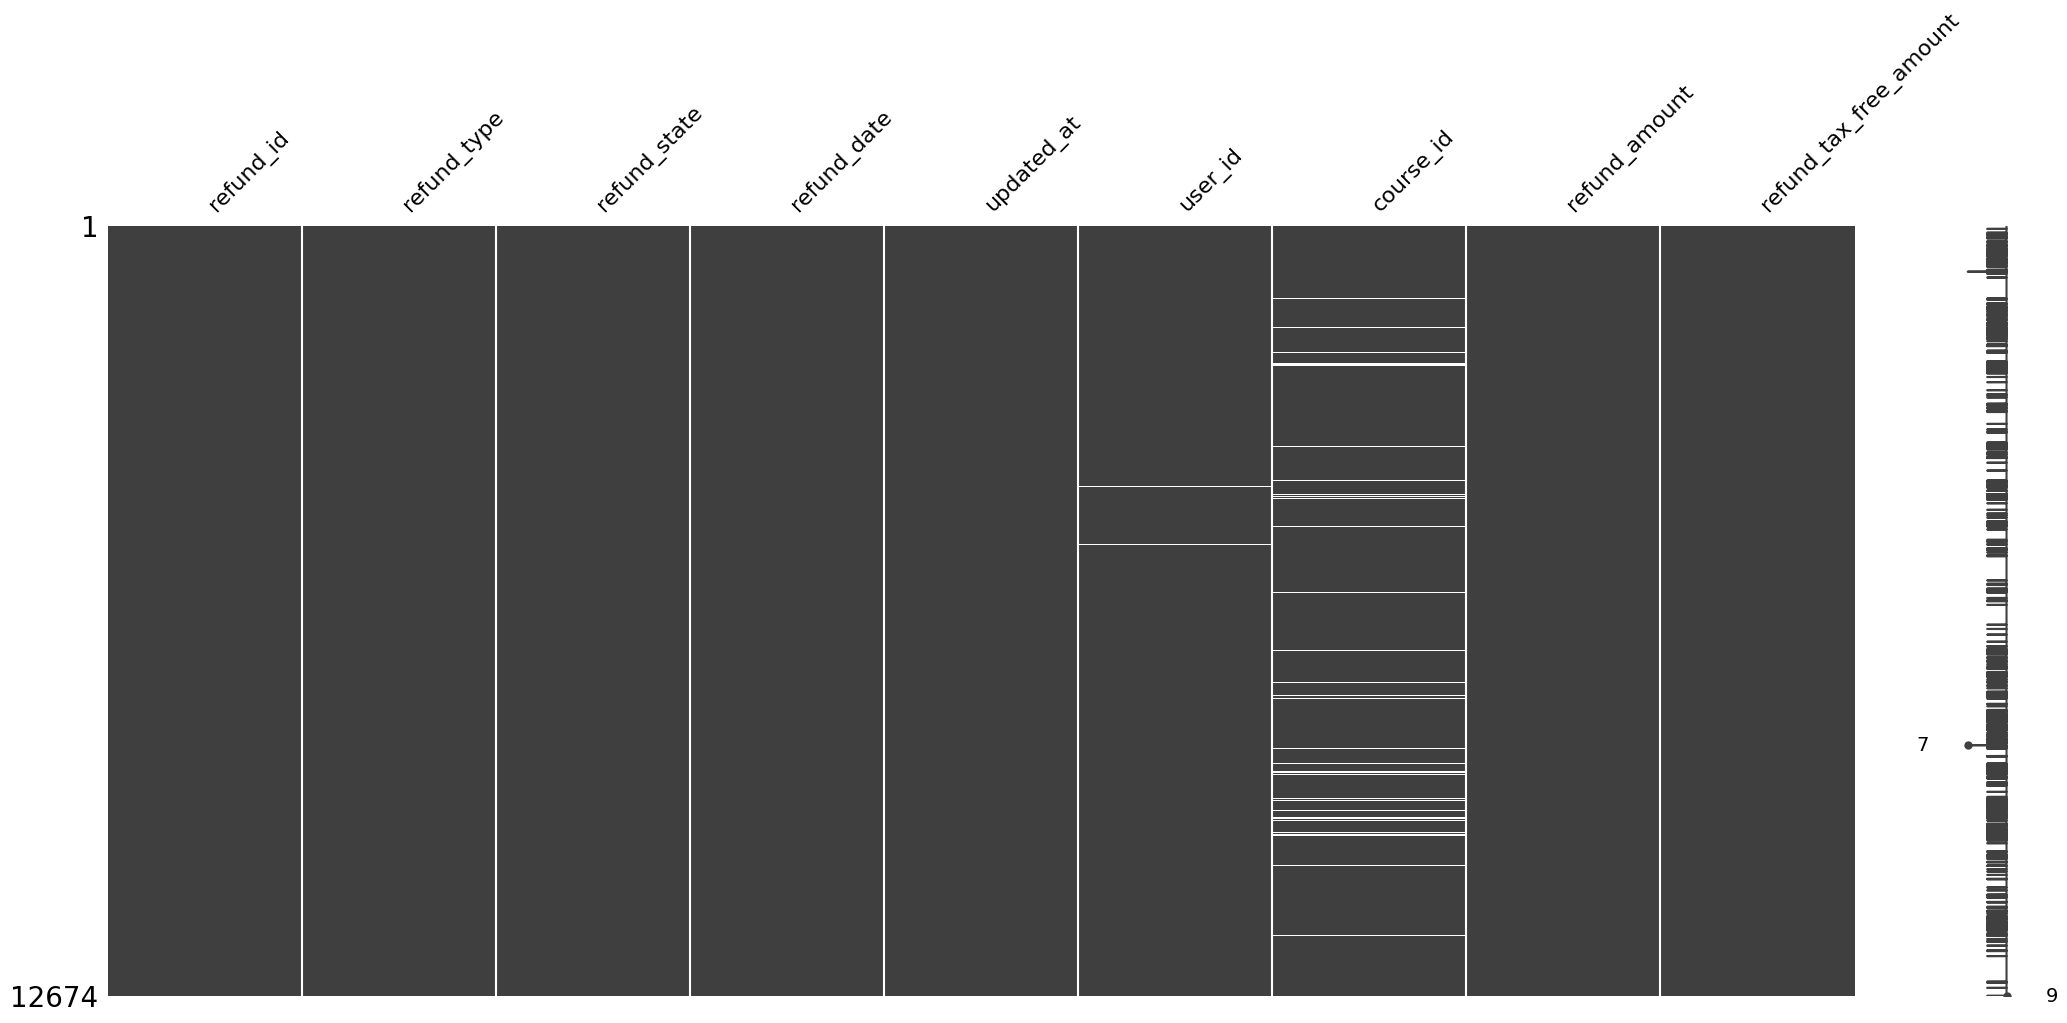

In [29]:
#결측치 패턴 시각화
msno.matrix(refund)

In [30]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [31]:
#course_id null인 그룹과 null 아닌 그룹은 매출액에 유의적 차이가 있는가? --> Yes

#두 그룹으로 분리
group1 = refund[refund['course_id'].notnull()]['refund_amount']
group2 = refund[refund['course_id'].isnull()]['refund_amount']

#t-test
t_statistic, p_value = ttest_ind(group1, group2)
print(f'p_value : {p_value:.4f}')


p_value : 0.0000


In [32]:
#course_id null인 경우의 환불액 평균이 훨씬 크다
print(refund[refund['course_id'].notnull()]['refund_amount'].mean())
print(refund[refund['course_id'].isnull()]['refund_amount'].mean())

-15599.171842650103
-51101.83639398999


## join

### 1. user - customer join
- user 정보가 먼저 생성된 후 customer 정보가 생성되었을 것으로 예상했으나, customer 정보가 먼저 생성된 경우도 다수 존재 (최대 2,281일까지 차이 발생)
- 한 user가 중복된 customer_id 가지는 경우도 존재

In [33]:
user_customer = pd.merge(user, customer, on = 'user_id', how = 'left')
user_customer.sort_values(by = 'user_id')

,user_id,user_type,user_state,user_join_date,last_login_at,user_name,user_join_time,customer_id,type,state,customer_name,phone,email,customer_join_date
123015,12,USER,NORMAL,2019-07-01,2023-09-21 01:29:06,iolo,23:49:35,23139.0,USER,NORMAL,USER_23139,1.012346e+09,USER_23139@notexistemail.com,2019-09-23
123014,14,USER,NORMAL,2019-07-03,2024-01-25 14:40:44,jmki,05:42:07,23154.0,USER,NORMAL,USER_23154,1.012346e+09,USER_23154@notexistemail.com,2019-09-24
123013,15,USER,NORMAL,2019-07-03,2024-01-10 06:03:52,nkle,07:19:53,29389.0,USER,NORMAL,USER_29389,1.012346e+09,USER_29389@notexistemail.com,2019-10-14
123012,18,USER,NORMAL,2019-08-19,2022-08-10 23:17:50,smki,01:57:00,23179.0,USER,NORMAL,USER_23179,1.012346e+09,USER_23179@notexistemail.com,2019-09-24
123011,20,USER,NORMAL,2019-08-19,2024-01-25 02:52:29,jhki,02:02:33,25659.0,USER,NORMAL,USER_25659,1.012346e+09,USER_25659@notexistemail.com,2019-10-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1075059,USER,NORMAL,2022-12-31,2023-02-17 01:54:52,kyg6,21:35:42,1083649.0,USER,NORMAL,USER_1083649,1.012346e+09,USER_1083649@notexistemail.com,2022-12-31
3,1075064,USER,NORMAL,2022-12-31,2023-10-06 18:20:51,tige,22:03:14,1083654.0,USER,NORMAL,USER_1083654,1.012346e+09,USER_1083654@notexistemail.com,2022-12-31
2,1075074,USER,NORMAL,2022-12-31,2023-10-19 11:49:10,theh,22:46:31,1083664.0,USER,NORMAL,USER_1083664,1.012346e+09,USER_1083664@notexistemail.com,2022-12-31
1,1075079,USER,NORMAL,2022-12-31,2023-12-03 23:34:40,toqu,23:08:47,1083669.0,USER,NORMAL,USER_1083669,1.012346e+09,USER_1083669@notexistemail.com,2022-12-31


In [34]:
user_customer['uc_period'] = user_customer['customer_join_date'] - user_customer['user_join_date']

In [35]:
user_customer[['user_id', 'customer_id', 'user_join_date', 'customer_join_date', 'uc_period']]

,user_id,customer_id,user_join_date,customer_join_date,uc_period
0,1075089,1083679.0,2022-12-31,2022-12-31,0 days
1,1075079,1083669.0,2022-12-31,2022-12-31,0 days
2,1075074,1083664.0,2022-12-31,2022-12-31,0 days
3,1075064,1083654.0,2022-12-31,2022-12-31,0 days
4,1075059,1083649.0,2022-12-31,2022-12-31,0 days
...,...,...,...,...,...
123011,20,25659.0,2019-08-19,2019-10-02,44 days
123012,18,23179.0,2019-08-19,2019-09-24,36 days
123013,15,29389.0,2019-07-03,2019-10-14,103 days
123014,14,23154.0,2019-07-03,2019-09-24,83 days


In [36]:
print(user_customer['uc_period'].min())
print(user_customer['uc_period'].max())

-2281 days +00:00:00
1510 days 00:00:00


In [37]:
user_customer[user_customer['uc_period'] < pd.Timedelta(0)].sort_values(by = 'uc_period')

,user_id,user_type,user_state,user_join_date,last_login_at,user_name,user_join_time,customer_id,type,state,customer_name,phone,email,customer_join_date,uc_period
96005,472023,USER,HIBERNATED,2021-05-14,2022-11-03 23:35:55,hy44,06:33:00,179567.0,USER,HIBERNATED,USER_179567,1.012346e+09,USER_179567@notexistemail.com,2015-02-14,-2281 days
95419,502757,USER,HIBERNATED,2021-05-14,2022-06-21 12:35:17,shao,09:00:39,179635.0,USER,NORMAL,USER_179635,1.012346e+09,USER_179635@notexistemail.com,2015-03-17,-2250 days
95229,512520,USER,NORMAL,2021-05-14,2023-05-17 05:32:05,wavb,09:45:09,179641.0,USER,NORMAL,USER_179641,1.012346e+09,USER_179641@notexistemail.com,2015-03-18,-2249 days
96004,472025,USER,NORMAL,2021-05-14,2024-01-23 03:23:23,hy86,06:33:00,179712.0,USER,NORMAL,USER_179712,1.012346e+09,USER_179712@notexistemail.com,2015-03-31,-2236 days
95860,479395,USER,NORMAL,2021-05-14,2023-06-17 06:55:31,jsk3,07:15:22,179823.0,USER,NORMAL,USER_179823,1.012346e+09,USER_179823@notexistemail.com,2015-04-26,-2210 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122893,1839,USER,NORMAL,2019-09-27,2023-04-24 06:58:52,kjsi,01:08:31,24017.0,USER,NORMAL,USER_24017,1.012346e+09,USER_24017@notexistemail.com,2019-09-26,-1 days
122991,1188,USER,NORMAL,2019-09-24,2024-01-11 01:59:57,cant,00:07:12,23030.0,USER,NORMAL,USER_23030,1.012346e+09,USER_23030@notexistemail.com,2019-09-23,-1 days
122993,1160,USER,HIBERNATED,2019-09-23,2023-01-18 05:03:44,eekb,14:04:23,22762.0,USER,HIBERNATED,USER_22762,1.012346e+09,USER_22762@notexistemail.com,2019-09-22,-1 days
122800,2343,USER,NORMAL,2019-09-29,2023-04-11 23:22:54,daso,10:34:14,24326.0,USER,NORMAL,USER_24326,1.012346e+09,USER_24326@notexistemail.com,2019-09-28,-1 days


In [38]:
print(user['user_id'].nunique())
print(customer['customer_id'].nunique())
print(customer['user_id'].nunique())

122989
123013
122986


In [39]:
customer[customer.duplicated(subset='customer_id', keep=False)].sort_values(by='user_id')

,customer_id,type,state,user_id,customer_name,phone,email,customer_join_date


In [40]:
#한 user가 중복된 customer_id 가지는 경우도 존재
customer[customer.duplicated(subset='user_id', keep=False)].sort_values(by='user_id')

,customer_id,type,state,user_id,customer_name,phone,email,customer_join_date
117401,55141,USER,NORMAL,13852,USER_55141,1012345678,USER_55141@notexistemail.com,2019-12-24
119659,34664,USER,NORMAL,13852,USER_34664,1012345678,USER_34664@notexistemail.com,2019-10-31
122377,6487,USER,NORMAL,13853,USER_6487,1012345678,USER_6487@notexistemail.com,2019-08-20
119658,34665,USER,NORMAL,13853,USER_34665,1012345678,USER_34665@notexistemail.com,2019-10-31
7,1436523,USER,NORMAL,14644,USER_1436523,1012345678,USER_1436523@notexistemail.com,2023-12-20
119591,35368,USER,HIBERNATED,14644,USER_35368,1012345678,USER_35368@notexistemail.com,2019-11-01
122231,11711,USER,NORMAL,16703,USER_11711,1012345678,USER_11711@notexistemail.com,2019-08-23
119414,37066,USER,NORMAL,16703,USER_37066,1012345678,USER_37066@notexistemail.com,2019-11-05
112717,107227,USER,NORMAL,92399,USER_107227,1012345678,USER_107227@notexistemail.com,2020-05-08
18,1198866,USER,NORMAL,92399,USER_1198866,1012345678,USER_1198866@notexistemail.com,2023-05-03


In [41]:
user[user['user_state'] == 'DELETED']

,user_id,user_type,user_state,user_join_date,last_login_at,user_name,user_join_time
60,1074865,USER,DELETED,2022-12-31,2023-01-01 08:49:56,SmJg,14:46:12
108,1074791,USER,DELETED,2022-12-31,2022-12-31 15:17:39,y/5R,14:06:00
231,1074559,USER,DELETED,2022-12-31,2023-01-04 07:46:49,ZVST,11:06:51
276,1074464,USER,DELETED,2022-12-31,2022-12-31 09:56:50,PeUY,09:21:31
329,1074342,USER,DELETED,2022-12-31,2022-12-31 07:39:49,WuXO,07:32:57
...,...,...,...,...,...,...,...
117291,46766,USER,DELETED,2020-01-12,2022-08-16 08:18:29,GiUd,11:02:26
117568,43646,USER,DELETED,2020-01-05,2023-02-11 06:11:03,SNZs,03:35:03
120128,21265,USER,DELETED,2019-11-17,2022-05-30 11:38:14,v3pd,13:02:47
122241,5781,USER,DELETED,2019-10-08,2022-09-07 13:16:25,ATuS,15:48:24


In [42]:
user_customer[user_customer['customer_id'].isnull()]

,user_id,user_type,user_state,user_join_date,last_login_at,user_name,user_join_time,customer_id,type,state,customer_name,phone,email,customer_join_date,uc_period
53201,856002,USER,DELETED,2022-04-28,2022-05-24 06:00:08,areu,08:42:33,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
99288,379486,USER,DELETED,2021-04-01,2022-12-25 12:52:56,hong,00:11:19,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
114430,76128,USER,DELETED,2020-03-19,2022-12-08 01:48:11,woo1,07:13:02,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT


### order - course join 시도

- 주문 강의명과 코스 타이틀로 join 시도했으나, 1:1 매칭 불가하여 join 불가능
- 주문 날짜, 주문 상태와 환불 일자의 선후 관계를 통해 join 시도하였으나, 예외 케이스 다수 존재하여 불가능(주문일자보다 환불이 먼저 발생한 경우도 있음)
[customer 146460의 주문/환불 내역 분석 결과](https://drive.google.com/file/d/1qFtoVNIlKDs_88MgdOl99wg63j1ypaDp/view?usp=drive_link)

In [43]:
#order['name']과 course['course_title']로 join 시도

In [44]:
order['name'].nunique()

1110

In [45]:
course['course_title'].nunique()

722

In [46]:
np.set_printoptions(threshold=np.inf)  # 배열의 모든 요소를 생략 없이 출력
order['name'].unique()

array(['[30일 수강] 엑', '한번에 끝내는 재무', '네오아카데미 : 까', '백엔드 개발자를 위',
       'React Nati', '[평생수강] 디자인', '[30일 수강] 디', '[30일 수강] 데',
       '[30일 수강] 딥', '[30일 수강] 코', 'The RED : ', '한 번에 끝내는 동',
       '[30일 수강] 영', '한 번에 끝내는 A', '용호수의 돈 버는 ', '플러스엑스 UX 팀',
       '의료 데이터를 활용', '네오아카데미 : 완', '한 번에 끝내는 P', '네오아카데미: 3명',
       '10개 프로젝트로', 'AI Paper :', '가장 빨리 도달하는', '플러스엑스 UX 실',
       '[평생수강] 데이터', '[평생수강] 딥러닝', '김민태의 프론트엔드', '한 번에 끝내는 구',
       '초격차 패키지 : ', '35개 프로젝트로', '한 번에 끝내는 프', 'Solana&Rus',
       '블렌더로 만드는 동', '아카데미 : 편집하', '딥러닝·인공지능 S', '한 번에 끝내는 J',
       '초격차 패키지: 한', '편집녀 프리미어+애', '카콜의 가볍게 시작', '권오상의 금융 아카',
       '네오아카데미: 오카', '한 번에 끝내는 S', '한 번에 끝내는 서', '게임 캐릭터 모델링',
       '[평생수강] 코딩 ', '[12개월 구독제]', '[평생수강] 엑셀 ', '일잘러 필수 스킬 ',
       '데이터 분석을 위한', '한 번에 끝내는 코', 'Kubernetes', '딥러닝/머신러닝을 ',
       '차근차근 따라하는 ', '코딩 왕초보를 위한', '개발자 취업 합격 ', '퍼포먼스 마케팅, ',
       '입문자를 위한 풀스', '랜선사수 피도리와 ', '한 번에 끝내는 딥', '네오아카데미 : 킨',
       '디자이너 몰래 듣는', 'C#과 유니티로 배', '한 끝으로 디자인 ', '[12월 프로

In [47]:
course['course_title'].unique()

array(['(B2G) K-Di-214903', '(B2G) K-Di-214898', '(B2G) K-Di-214897',
       '(B2G) K-Di-214896', '(B2G) K-Di-214895', '(B2G) K-Di-214894',
       '(B2G) K-Di-214893', '(B2G)K-Dig-214892', '(B2G)K-Dig-214891',
       '(B2G) K-Di-214889', '(B2G) K-Di-214888', '(B2G) K-Di-214887',
       '(B2G) K-Di-214886', '(B2G) K-Di-214885', '(B2G) K-Di-214884',
       '(B2G) K-Di-214883', '네오아카데미 : 오-214834', '네오아카데미 : 후-214833',
       'Solana & R-214587', 'Solana&Rus-214561', '입문자를 위한 풀스-214558',
       '(B2G) K-Di-214540', '(B2G) K-Di-214506', '(B2B) K-Di-214504',
       '(B2G)K-Dig-214503', '(B2G)K-Dig-214502', '(B2G) K-Di-214501',
       '(B2G) K-Di-214500', '(B2G) K-Di-214499', '(B2G) K-Di-214498',
       '(B2G) K-Di-214497', '한 번에 끝내는 자-214496', '(B2G) K-Di-214495',
       '(B2G) K-Di-214494', '빵형의 수학 없이 -214402', '한 번에 끝내는 J-214383',
       '[쉐어엑스]플러스엑-214323', '[쉐어엑스]플러스엑-214322', '[쉐어엑스]플러스엑-214321',
       '[쉐어엑스]플러스엑-214320', '[쉐어엑스]플러스엑-214319', 'AWS/GCP/Az-214302',
       '랜선사수 피도리와 -2

In [48]:
refund_customer = pd.merge(refund, user_customer, on = 'user_id', how = 'left')

In [49]:
#146460 customer의 refund/order 내역 분석

In [50]:
#refund_date의 범위 : 22.01.03~22.10.19
refund_customer[refund_customer['customer_id'] == 146460]

,refund_id,refund_type,refund_state,refund_date,updated_at,user_id,course_id,refund_amount,refund_tax_free_amount,user_type,...,user_name,user_join_time,customer_id,type,state,customer_name,phone,email,customer_join_date,uc_period
2895,65213,ADMIN_AUTO_REFUND,COMPLETED,2022-10-19 1:22,2022-10-19 1:22,132488.0,203935.0,-20000,-20000,USER,...,unka,11:46:23,146460.0,USER,NORMAL,USER_146460,1.012346e+09,USER_146460@notexistemail.com,2020-08-16,0 days
12635,44885,ADMIN_AUTO_REFUND,COMPLETED,2022-01-03 1:55,2022-01-03 1:55,132488.0,208595.0,0,0,USER,...,unka,11:46:23,146460.0,USER,NORMAL,USER_146460,1.012346e+09,USER_146460@notexistemail.com,2020-08-16,0 days
12636,44884,ADMIN_AUTO_REFUND,COMPLETED,2022-01-03 1:54,2022-01-03 1:54,132488.0,209016.0,-10000,-10000,USER,...,unka,11:46:23,146460.0,USER,NORMAL,USER_146460,1.012346e+09,USER_146460@notexistemail.com,2020-08-16,0 days
12637,44883,ADMIN_AUTO_REFUND,COMPLETED,2022-01-03 1:54,2022-01-03 1:54,132488.0,203533.0,-10000,-10000,USER,...,unka,11:46:23,146460.0,USER,NORMAL,USER_146460,1.012346e+09,USER_146460@notexistemail.com,2020-08-16,0 days
12638,44882,ADMIN_AUTO_REFUND,COMPLETED,2022-01-03 1:54,2022-01-03 1:54,132488.0,202357.0,-10000,-10000,USER,...,unka,11:46:23,146460.0,USER,NORMAL,USER_146460,1.012346e+09,USER_146460@notexistemail.com,2020-08-16,0 days
12639,44881,ADMIN_AUTO_REFUND,COMPLETED,2022-01-03 1:54,2022-01-03 1:54,132488.0,206060.0,-10000,-10000,USER,...,unka,11:46:23,146460.0,USER,NORMAL,USER_146460,1.012346e+09,USER_146460@notexistemail.com,2020-08-16,0 days
12640,44880,ADMIN_AUTO_REFUND,COMPLETED,2022-01-03 1:53,2022-01-03 1:53,132488.0,206257.0,-20000,-20000,USER,...,unka,11:46:23,146460.0,USER,NORMAL,USER_146460,1.012346e+09,USER_146460@notexistemail.com,2020-08-16,0 days
12641,44879,ADMIN_AUTO_REFUND,COMPLETED,2022-01-03 1:53,2022-01-03 1:53,132488.0,206356.0,-10000,-10000,USER,...,unka,11:46:23,146460.0,USER,NORMAL,USER_146460,1.012346e+09,USER_146460@notexistemail.com,2020-08-16,0 days
12642,44878,ADMIN_AUTO_REFUND,COMPLETED,2022-01-03 1:52,2022-01-03 1:52,132488.0,203532.0,-20000,-20000,USER,...,unka,11:46:23,146460.0,USER,NORMAL,USER_146460,1.012346e+09,USER_146460@notexistemail.com,2020-08-16,0 days
12643,44877,ADMIN_AUTO_REFUND,COMPLETED,2022-01-03 1:52,2022-01-03 1:52,132488.0,203047.0,-20000,-20000,USER,...,unka,11:46:23,146460.0,USER,NORMAL,USER_146460,1.012346e+09,USER_146460@notexistemail.com,2020-08-16,0 days


In [51]:
#order_date의 범위 22.05.28~22.10.17
order[(order['customer_id'] == 146460) & (order['order_state'] == 'COMPLETED')]

,order_id,order_type,order_state,name,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price,order_date,weekday
70875,1410108,ORDER,COMPLETED,한 번에 끝내는 파,2022-10-17 12:31:51,2022-10-17 12:32:02,146460,30000,30000,0,30000,2022-10-17,Monday
177312,1083141,ORDER,COMPLETED,한번에 끝내는 Ja,2022-05-28 04:16:14,2022-05-28 04:16:30,146460,30000,30000,0,30000,2022-05-28,Saturday


In [52]:
course[course['course_id'] == 203935]

,course_id,course_type,course_state,created_at,updated_at,course_title,description,close_at,total_class_hours,keywords
626,203935,COURSE,HIDDEN,2020-12-29 5:16,2023-10-06 7:11,한 번에 끝내는 파-203935,파이썬 웹 개발+크,NaN,80.0,"Django,FastAPI,Flask,백엔드,backend,python,html,b..."


In [53]:
#case 2 -  custoemr_id == 906470
refund_customer[refund_customer['customer_id'] == 906470]

,refund_id,refund_type,refund_state,refund_date,updated_at,user_id,course_id,refund_amount,refund_tax_free_amount,user_type,...,user_name,user_join_time,customer_id,type,state,customer_name,phone,email,customer_join_date,uc_period
6751,56498,ADMIN_AUTO_REFUND,COMPLETED,2022-06-24 1:56,2022-06-24 1:56,896576.0,207488.0,-30000,-30000,USER,...,adio,01:16:14,906470.0,USER,NORMAL,USER_906470,1.012346e+09,USER_906470@notexistemail.com,2022-06-21,0 days
6752,56497,ADMIN_AUTO_REFUND,COMPLETED,2022-06-24 1:55,2022-06-24 1:55,896576.0,206813.0,-40000,-40000,USER,...,adio,01:16:14,906470.0,USER,NORMAL,USER_906470,1.012346e+09,USER_906470@notexistemail.com,2022-06-21,0 days


In [54]:
order[order['customer_id'] == 906470]

,order_id,order_type,order_state,name,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price,order_date,weekday
160684,1136163,ORDER,COMPLETED,올인원 패키지 :,2022-06-23 07:56:28,2022-06-23 07:57:17,906470,50000,50000,0,50000,2022-06-23,Thursday
160685,1136160,ORDER,COMPLETED,온라인 패키지 :,2022-06-23 07:54:39,2022-06-23 07:56:03,906470,40000,40000,0,40000,2022-06-23,Thursday


In [55]:
course[course['course_id'] ==207488]

,course_id,course_type,course_state,created_at,updated_at,course_title,description,close_at,total_class_hours,keywords
510,207488,COURSE,ONGOING,2021-09-06 8:55,2023-11-20 0:41,머신러닝 서비스 구-207488,국내 유일 MLOp,NaN,21.0,"MLOps,최초최신"


In [56]:
course[course['course_id'] ==206813]

,course_id,course_type,course_state,created_at,updated_at,course_title,description,close_at,total_class_hours,keywords
525,206813,COURSE,HIDDEN,2021-08-02 7:53,2023-11-20 0:41,실시간 빅데이터 처-206813,4가지 툴로 파이프,NaN,18.0,"스트림프로세싱,flink,최초최신,스트림 프로세싱,kafka spark 차이,kaf..."


# 데이터 집계- SQL 쿼리


- Q1-1. 5개의 테이블(order, customer, course, refund, user)을 하나의 테이블로 조인하는 쿼리를 작성해주세요.

- Q1-2. (Order) 각 강의별 가장 첫 번째로 신청한 유저와 가장 마지막에 신청한 유저와 그 때의 날짜를 구하시오. (First_Value, Last_value, partition by)

- Q1-3. Order 테이블의 list_price를 월별로 합계한 후, 전달 대비 얼마나 증가하였는지, %지를 구하시오(lead, lag)

### 강의별 첫번째/마지막 신청 유저 및 날짜(FIRST_VALUE, LAST_VALUE, PARTITION BY)

In [57]:
'''
SELECT
    DISTINCT name AS course_name,
    FIRST_VALUE(customer_id) OVER (
        PARTITION BY name
        ORDER BY created_at
    ) AS first_user,
    FIRST_VALUE(created_at) OVER (
        PARTITION BY name
        ORDER BY created_at
    ) AS first_user_date,
    LAST_VALUE(customer_id) OVER (
        PARTITION BY name
        ORDER BY created_at
        RANGE BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING
    ) AS last_user,
    LAST_VALUE(created_at) OVER (
        PARTITION BY name
        ORDER BY created_at
        RANGE BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING
    ) AS last_user_date
FROM
    final_pjt_fastcampus.order;

'''

'\nSELECT\n    DISTINCT name AS course_name,\n    FIRST_VALUE(customer_id) OVER (\n        PARTITION BY name\n        ORDER BY created_at\n    ) AS first_user,\n    FIRST_VALUE(created_at) OVER (\n        PARTITION BY name\n        ORDER BY created_at\n    ) AS first_user_date,\n    LAST_VALUE(customer_id) OVER (\n        PARTITION BY name\n        ORDER BY created_at\n        RANGE BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING\n    ) AS last_user,\n    LAST_VALUE(created_at) OVER (\n        PARTITION BY name\n        ORDER BY created_at\n        RANGE BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING\n    ) AS last_user_date\nFROM\n    final_pjt_fastcampus.order;\n\n'

## 월별 list_price 합계 및 전달 대비 증가율(LEAD, LAG)

In [58]:
'''
SELECT
    DATE_FORMAT(created_at, '%Y-%m') AS month,
    SUM(list_price) AS monthly_total,
    LAG(SUM(list_price)) OVER (
        ORDER BY DATE_FORMAT(created_at, '%Y-%m')
    ) AS previous_month_total,
    SUM(list_price) - LAG(SUM(list_price)) OVER (
        ORDER BY DATE_FORMAT(created_at, '%Y-%m')
    ) AS difference,
    ((SUM(list_price) - LAG(SUM(list_price)) OVER (
        ORDER BY DATE_FORMAT(created_at, '%Y-%m')
    )) / LAG(SUM(list_price)) OVER (
        ORDER BY DATE_FORMAT(created_at, '%Y-%m')
    )) * 100 AS percentage_change
FROM
    final_pjt_fastcampus.order
GROUP BY
    DATE_FORMAT(created_at, '%Y-%m')
ORDER BY
    month;

'''

"\nSELECT\n    DATE_FORMAT(created_at, '%Y-%m') AS month,\n    SUM(list_price) AS monthly_total,\n    LAG(SUM(list_price)) OVER (\n        ORDER BY DATE_FORMAT(created_at, '%Y-%m')\n    ) AS previous_month_total,\n    SUM(list_price) - LAG(SUM(list_price)) OVER (\n        ORDER BY DATE_FORMAT(created_at, '%Y-%m')\n    ) AS difference,\n    ((SUM(list_price) - LAG(SUM(list_price)) OVER (\n        ORDER BY DATE_FORMAT(created_at, '%Y-%m')\n    )) / LAG(SUM(list_price)) OVER (\n        ORDER BY DATE_FORMAT(created_at, '%Y-%m')\n    )) * 100 AS percentage_change\nFROM\n    final_pjt_fastcampus.order\nGROUP BY\n    DATE_FORMAT(created_at, '%Y-%m')\nORDER BY\n    month;\n\n"

# EDA

## 1월 중 매출 최고/최저 3일
- status = COMPLETED 기준
- 매출이 가장 높았던 3일 : 1/3, 1/7, 1/5
- 매출이 가장 낮았던 3일 : 1/29, 1/22, 1/1
- 매출이 가장 낮았던 3일은 모두 토요일이다.

In [59]:
#state = completed만 추출
order_completed = order[order['order_state']== 'COMPLETED']
#1월 데이터만 추출
order_jan = order_completed[order_completed['order_date']<='2022-01-31']
order_jan.head()

,order_id,order_type,order_state,name,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price,order_date,weekday
253310,853323,ORDER,COMPLETED,나의 칼퇴치트키 엑,2022-01-31 23:52:36,2022-01-31 23:54:02,791388,20000,20000,10000,20000,2022-01-31,Monday
253311,853322,ORDER,COMPLETED,나의 칼퇴치트키 엑,2022-01-31 23:51:02,2022-01-31 23:51:35,560400,20000,20000,0,20000,2022-01-31,Monday
253313,853317,ORDER,COMPLETED,클라우드를 활용한,2022-01-31 23:39:04,2022-01-31 23:39:54,279538,50000,50000,0,50000,2022-01-31,Monday
253314,853314,ORDER,COMPLETED,한 번에 끝내는 디,2022-01-31 23:30:16,2022-01-31 23:31:07,790438,30000,30000,0,30000,2022-01-31,Monday
253316,853311,ORDER,COMPLETED,직장인이 진짜 필요,2022-01-31 23:21:17,2022-01-31 23:22:31,24156,20000,20000,10000,20000,2022-01-31,Monday


In [60]:
#날짜별 매출액 집계
order_jan_sum = order_jan.groupby('order_date').agg({'list_price': 'sum'}).reset_index()
order_jan_sum = order_jan_sum.sort_values(by = 'list_price', ascending = False)


In [61]:
#요일 추가
order_jan_sum['weekday'] = order_jan_sum['order_date'].dt.day_name()

In [62]:
# 1월 상위 매출 3일
order_jan_sum.head(3)

,order_date,list_price,weekday
2,2022-01-03,48980000,Monday
6,2022-01-07,34700000,Friday
4,2022-01-05,33840000,Wednesday


In [63]:
# 1월 하위 매출 3일
order_jan_sum.tail(3)

,order_date,list_price,weekday
28,2022-01-29,8920000,Saturday
21,2022-01-22,6850000,Saturday
0,2022-01-01,6260000,Saturday


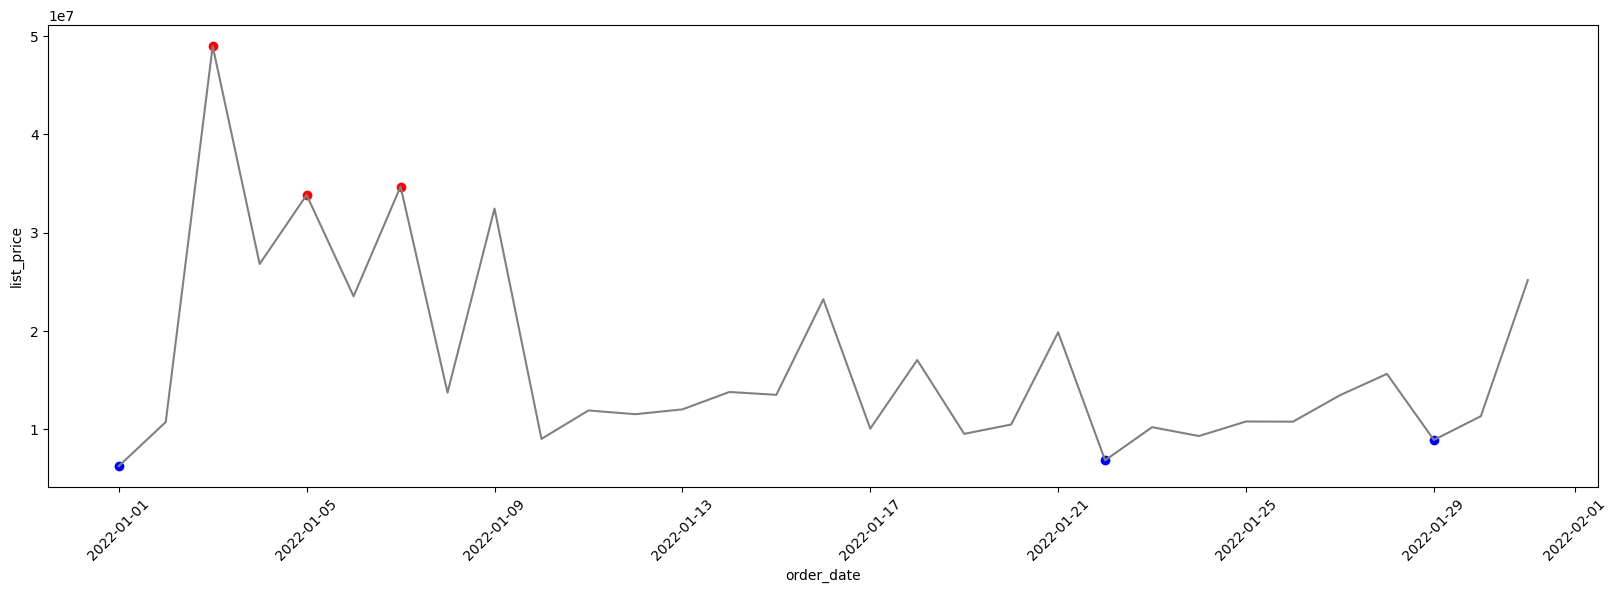

In [64]:
# 매출이 높았던 상위 3일과 낮았던 하위 3일을 찾음
top_days = order_jan_sum.nlargest(3, 'list_price')['order_date']
bottom_days = order_jan_sum.nsmallest(3, 'list_price')['order_date']

plt.figure(figsize=(20,6))
sns.lineplot(data = order_jan_sum, x='order_date', y='list_price', color = 'grey')

# 상위 매출 날짜에 대해 다른 색의 마커 추가
for day in top_days:
    plt.scatter(day, order_jan_sum.loc[order_jan_sum['order_date'] == day, 'list_price'], color='red')

# 하위 매출 날짜에 대해 또 다른 색의 마커 추가
for day in bottom_days:
    plt.scatter(day, order_jan_sum.loc[order_jan_sum['order_date'] == day, 'list_price'], color='blue')

plt.xticks(rotation=45) # 날짜가 겹치지 않도록 회전
plt.show()


## 1월 daily 매출액, 주문 수, 신청자 수, 강의 수


In [65]:

# 날짜별 매출액, 주문 수, 고객 수 계산
daily_sales = order_jan.groupby('order_date').agg({
    'list_price': 'sum',  # 매출액 합계
    'order_id': 'nunique',  # 주문 수 (주문 ID의 distinct count)
    'customer_id': 'nunique'  # 신청자 수 (고객 ID의 distinct count)
}).reset_index()

daily_sales.columns = ['order_date', 'list_price_sum', 'order_count', 'customer_count']

daily_sales.head()

,order_date,list_price_sum,order_count,customer_count
0,2022-01-01,6260000,238,223
1,2022-01-02,10740000,412,383
2,2022-01-03,48980000,1863,1671
3,2022-01-04,26820000,1029,906
4,2022-01-05,33840000,1276,1149


In [66]:
# 각 날짜별 강의 수 계산
courses_per_day = order_jan.groupby('order_date')['name'].nunique().reset_index()

courses_per_day.columns = ['order_date', 'course_count']

courses_per_day.head()

,order_date,course_count
0,2022-01-01,91
1,2022-01-02,124
2,2022-01-03,187
3,2022-01-04,174
4,2022-01-05,172


In [67]:
#날짜 기준으로 한 데이터프레임으로 합치기(join)
daily_summary = daily_sales.merge(courses_per_day, on='order_date', how = 'inner')
daily_summary.head()

,order_date,list_price_sum,order_count,customer_count,course_count
0,2022-01-01,6260000,238,223,91
1,2022-01-02,10740000,412,383,124
2,2022-01-03,48980000,1863,1671,187
3,2022-01-04,26820000,1029,906,174
4,2022-01-05,33840000,1276,1149,172


In [68]:
# 1월 상위 매출 3일의 매출액, 주문수, 고객수, 강의수
daily_summary.sort_values(by = 'list_price_sum', ascending = False).head(3)

,order_date,list_price_sum,order_count,customer_count,course_count
2,2022-01-03,48980000,1863,1671,187
6,2022-01-07,34700000,1305,1136,179
4,2022-01-05,33840000,1276,1149,172


In [69]:
# 1월 하위 매출 3일의 매출액, 주문수, 고객수, 강의수
daily_summary.sort_values(by = 'list_price_sum', ascending = False).tail(3)

,order_date,list_price_sum,order_count,customer_count,course_count
28,2022-01-29,8920000,332,298,107
21,2022-01-22,6850000,217,186,105
0,2022-01-01,6260000,238,223,91


## 월별 각 강의 별 할인율

In [70]:
#yyyy-mm컬럼 만들기
order['order_year_month'] = order['order_date'].dt.to_period('M')


In [71]:
#할인율 계산
order_month_sum = order.groupby(['order_year_month', 'name']).agg({
    'list_price' : 'sum',  # 매출액 합계
    'sale_price' : 'sum' #판매액 합계
}).reset_index()

order_month_sum.columns = ['order_year_month', 'name', 'list_price_sum', 'sale_price_sum']
order_month_sum

,order_year_month,name,list_price_sum,sale_price_sum
0,2022-01,(B2B) 42SE,120000,120000
1,2022-01,(B2B) K-Di,1100000,560000
2,2022-01,(B2B) 디캠프,60000,60000
3,2022-01,(B2B) 비바리퍼,180000,180000
4,2022-01,(B2B) 빌리지베,50000,50000
...,...,...,...,...
4491,2022-12,현업 프로젝트로 배,1160000,1160000
4492,2022-12,현직 Advisor,210000,180000
4493,2022-12,화사한 색감과 빛의,240000,220000
4494,2022-12,확실하게 끝내는 포,1200000,1050000


In [72]:
order_month_sum['discount_rate(%)'] = ((order_month_sum['list_price_sum'] - order_month_sum['sale_price_sum']) *100 / order_month_sum['list_price_sum']).round(1)
order_month_sum.head(20)

,order_year_month,name,list_price_sum,sale_price_sum,discount_rate(%)
0,2022-01,(B2B) 42SE,120000,120000,0.0
1,2022-01,(B2B) K-Di,1100000,560000,49.1
2,2022-01,(B2B) 디캠프,60000,60000,0.0
3,2022-01,(B2B) 비바리퍼,180000,180000,0.0
4,2022-01,(B2B) 빌리지베,50000,50000,0.0
5,2022-01,(B2B) 와이즈셀,60000,60000,0.0
6,2022-01,(B2B) 이지엠앤,180000,180000,0.0
7,2022-01,(B2B) 주식회사,540000,540000,0.0
8,2022-01,(B2B) 크몽 온,530000,530000,0.0
9,2022-01,(B2B) 하나금융,26760000,26760000,0.0


## 강의별 상위 출현 키워드
- '평생소장'(91), '프로그래밍'(67), '데이터사이언스'(62), '마케팅'(47) '디자인'(42) 등이 상위 키워드로 나타남

In [73]:
#Q2-4
from collections import Counter

# keywords 컬럼에서 키워드 split --> 하나의 리스트로 모음(결측치 제외)
keywords_list = course['keywords'].dropna().str.split(',').sum()

# 키워드별 출현 빈도 계산
keywords_frequency = Counter(keywords_list)

# 가장 많이 출현하는 키워드 상위 10개 출력
keywords_frequency.most_common(10)


[('평생소장', 91),
 ('프로그래밍', 67),
 ('데이터사이언스', 62),
 ('마케팅', 47),
 ('디자인', 42),
 ('딥러닝', 41),
 ('일러스트', 39),
 ('포토샵', 39),
 ('데이터', 37),
 ('숏북', 37)]

In [74]:
#한글폰트설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

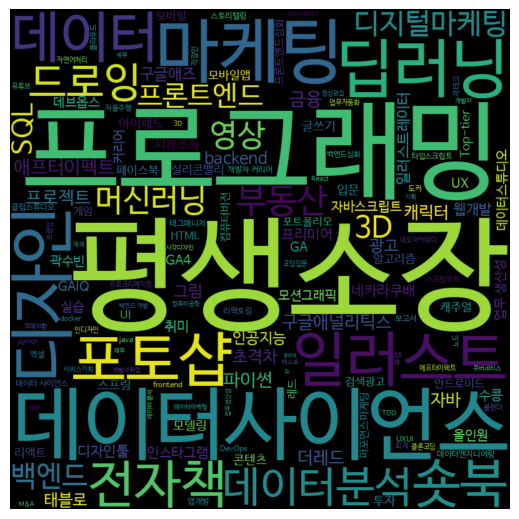

In [75]:
from wordcloud import WordCloud

# 워드클라우드 생성

wordcloud = WordCloud(
    width = 800, height = 800,
    background_color ='black',
    font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',  # 나눔글꼴 폰트 경로
    min_font_size = 10).generate_from_frequencies(keywords_frequency)

# 워드클라우드 표시
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)



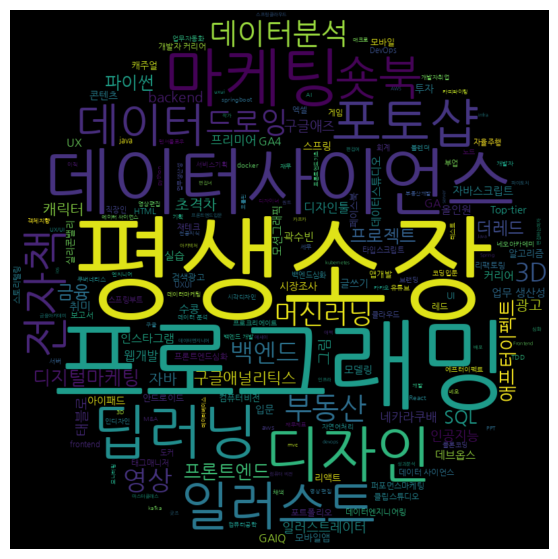

In [76]:

# 원형 마스크 생성
def create_circle_mask(width, height, center=None, radius=None):
    if center is None:  # 마스크의 중심을 지정하지 않으면 이미지 중앙을 사용
        center = (int(width/2), int(height/2))
    if radius is None:  # 반지름을 지정하지 않으면 가능한 최대 반지름 사용
        radius = min(center[0], center[1], width-center[0], height-center[1])

    Y, X = np.ogrid[:height, :width]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    mask = dist_from_center > radius  # 원 바깥과 안을 반전
    return 255 * mask.astype(int)

width, height = 800, 800
mask = create_circle_mask(width, height)

# 워드클라우드 생성
wordcloud = WordCloud(width=width, height=height, background_color='black',
                      mask=mask, contour_width=0, contour_color='steelblue',
                      font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate_from_frequencies(keywords_frequency)

# 워드클라우드 표시
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## 강의별 환불 횟수
- course_id가 211368인 강의(10개 프로젝트로~)의 환불이 269건으로  가장 많은 것으로 나타났으나, course_id가 비어있는 컬럼이 599개이기 때문에, 결측치 대체 후 재분석이 필요함

In [77]:
# Q2-5 (Refund) 환불이 가장 많은 강의는 어떤 강의였나요?

#course_id별 환불 횟수 집계
refund_course = refund.groupby('course_id').agg({'refund_id': 'count'}).reset_index().sort_values(by = 'refund_id', ascending = False)
refund_course.rename(columns = {'refund_id' : 'refund_count'}, inplace = True)

#course와 merge
refund_course_n = pd.merge(refund_course, course, on = 'course_id', how = 'left')
refund_course_n = refund_course_n[['course_id', 'refund_count', 'course_title']]
refund_course_n

,course_id,refund_count,course_title
0,211368.0,269,10개 프로젝트로 -211368
1,203525.0,224,한 번에 끝내는 J-203525
2,203720.0,205,한 번에 끝내는 프-203720
3,204373.0,187,일잘러 필수 스킬 -204373
4,212600.0,182,네오아카데미 : 완-212600
...,...,...,...
499,211174.0,1,대기업 연봉 편집자-211174
500,211171.0,1,피 튀기는 주식 투-211171
501,203657.0,1,The RED : -203657
502,211094.0,1,NaN


In [78]:
refund['course_id'].isnull().sum()

599

## 주문횟수/주문금액 최다 고객
- 가장 "많이"의 기준을 횟수, 금액(sale_price, list_price)에 따라 각각 구함
- 주문 횟수 가장 많은 고객 == 793517, 주문금액(list_price) == 7910000, 판매금액(sale_price) == 70000
- 주문 금액(list_price), 판매금액(sale_price) 가장 많은 고객 == 116416, 주문금액(list_price) == 25030000, 판매금액(sale_price) == 25030000

   - 116416 회원의 주문 내역 분석 시, '(B2B) 하나금융~' 강의를 많이 구매하여 기업 대량 구매 고객인 것으로 추정


In [79]:

## 주문 완료(order_state == 'COMPLETED') 기준으로 고객별 강의신청 횟수 및 금액 집계
order_customer = pd.merge(order, customer, on = 'customer_id', how = 'left')
order_customer = order_customer[order_customer['order_state'] == 'COMPLETED']
customer_order_count = order_customer.groupby('customer_id').agg({'order_id' : 'count', 'list_price' : 'sum', 'sale_price' : 'sum'}, inplace=True).reset_index()
customer_order_count.rename(columns = {'order_id' : 'order_count', 'list_price' : 'list_price_sum', 'sale_price' : 'sale_price_sum'}, inplace = True)

## 주문횟수 가장 많은 고객
customer_order_count.sort_values(by = 'order_count', ascending = False)


,customer_id,order_count,list_price_sum,sale_price_sum
41792,793517,307,7910000,70000
38631,777099,288,7310000,90000
41790,793514,229,5240000,30000
14540,276705,159,4190000,350000
8070,98685,143,3270000,2550000
...,...,...,...,...
17320,414551,1,30000,30000
51488,847721,1,40000,40000
51489,847725,1,20000,20000
17319,414529,1,100000,0


In [80]:
## 주문금액 가장 많은 고객(list_price 기준)
customer_order_count.sort_values(by = 'list_price_sum', ascending = False)

,customer_id,order_count,list_price_sum,sale_price_sum
9264,116416,6,25030000,25030000
41792,793517,307,7910000,70000
38631,777099,288,7310000,90000
41790,793514,229,5240000,30000
14540,276705,159,4190000,350000
...,...,...,...,...
27140,636413,1,10000,10000
34816,759638,1,10000,10000
27142,636430,1,10000,10000
90808,1068237,1,10000,0


In [81]:
## 주문금액 가장 많은 고객(sale_price 기준)
customer_order_count.sort_values(by = 'sale_price_sum', ascending = False)

,customer_id,order_count,list_price_sum,sale_price_sum
9264,116416,6,25030000,25030000
30958,714775,37,2760000,2630000
8070,98685,143,3270000,2550000
63588,921091,1,2020000,2020000
551,6475,6,1650000,1650000
...,...,...,...,...
67790,943790,1,30000,0
81209,1011708,3,90000,0
89638,1064049,1,100000,0
26930,632222,1,30000,0


In [82]:
order_116416 = order[(order['customer_id'] == 116416) & (order['order_state'] == 'COMPLETED')]
order_116416

,order_id,order_type,order_state,name,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price,order_date,weekday,order_year_month
64321,1429792,ORDER,COMPLETED,(B2B) 하나금융,2022-10-28 07:30:45,2022-10-28 07:35:05,116416,2530000,2530000,0,2530000,2022-10-28,Friday,2022-10
132498,1225052,ORDER,COMPLETED,(B2B) 하나금융,2022-07-29 01:26:38,2022-07-29 01:29:53,116416,5270000,5270000,0,5270000,2022-07-29,Friday,2022-07
132506,1225033,ORDER,COMPLETED,(B2B) 하나금융,2022-07-29 01:18:57,2022-07-29 01:19:38,116416,5270000,5270000,0,5270000,2022-07-29,Friday,2022-07
193388,1032396,ORDER,COMPLETED,(B2B) 하나금융,2022-04-29 05:37:03,2022-04-29 05:40:07,116416,4830000,4830000,0,4830000,2022-04-29,Friday,2022-04
263323,821913,ORDER,COMPLETED,(B2B) 하나금융,2022-01-18 05:09:18,2022-01-18 05:10:59,116416,6690000,6690000,0,6690000,2022-01-18,Tuesday,2022-01
263939,819837,ORDER,COMPLETED,하나금융티아이_DT,2022-01-17 04:35:40,2022-01-17 04:37:52,116416,440000,440000,0,440000,2022-01-17,Monday,2022-01


## 주말과 주중의 평균 강의 신청율
- 주중과 주말의 일별(per day) 평균 계산 후 비율을 구했을 때(주중:주말 가중치 5:2로 고려), 주중 신청률 53.6%, 주말 신청율 46.4%로 주중이 근소하게 높게 나타났으나 큰 차이는 없음

In [83]:
# Q2-7 (Order) 주말과 주중의 평균 강의 신청율은 어떻게 다를까요?


order['weekend'] = order['weekday'].apply(lambda x: 'weekend' if x in ['Saturday', 'Sunday'] else 'weekday')


In [84]:

weekday_orders_per_day = order[order['weekend'] == 'weekday']['order_id'].count() / 5
weekend_orders_per_day = order[order['weekend'] == 'weekend']['order_id'].count() / 2


print('주중 강의 신청률(%):', weekday_orders_per_day *100 / (weekday_orders_per_day + weekend_orders_per_day))
print('주말 강의 신청률(%):', weekend_orders_per_day *100 / (weekday_orders_per_day + weekend_orders_per_day))

주중 강의 신청률(%): 53.5984259069898
주말 강의 신청률(%): 46.401574093010204


In [85]:
import plotly.graph_objs as go

# 주말과 주중의 강의 주문 횟수 계산
weekday_orders = order[order['weekend'] == 'weekday']['order_id'].count()
weekend_orders = order[order['weekend'] == 'weekend']['order_id'].count()

# Plotly 바 차트 생성_횟수
data = [
    go.Bar(
        x=['Weekday', 'Weekend'],
        y=[weekday_orders, weekend_orders]
    )
]

layout = go.Layout(
    title='주중과 주말의 강의 주문 횟수(total)',
    xaxis=dict(title='주중/주말'),
    yaxis=dict(title='주문 횟수')
)

fig = go.Figure(data=data, layout=layout)
fig.show()


In [86]:
# Plotly 바 차트 생성(1일 기준))
data = [
    go.Bar(
        x=['Weekday', 'Weekend'],
        y=[weekday_orders_per_day , weekend_orders_per_day ]
    )
]

layout = go.Layout(
    title='주중과 주말의 강의 주문 횟수(per day)',
    xaxis=dict(title='주중/주말'),
    yaxis=dict(title='주문 횟수(per day)')
)

fig = go.Figure(data=data, layout=layout)
fig.show()

## 회원가입 활발한 시간대
- (User) 주로 몇시에 회원 가입(created_at)이 활발했나요? 월별로 차이가 있는지 보여주고, 그 근거를 추론해 보세요
- 12, 1, 2, 8, 9월 : 13~14시에 회원가입 활발
- 나머지 월 : 4~8시에 회원가입 활발
- 방학 중 자기계발의 영향으로 낮에 활발한 회원가입을 하는 것으로 보임


In [87]:
# Q2-8 (User) 주로 몇시에 회원 가입(created_at)이 활발했나요? 월별로 차이가 있는지 보여주고, 그 근거를 추론해 보세요
user['user_join_month'] = user['user_join_date'].dt.month
user['user_join_hour'] = pd.to_datetime(user['user_join_time'], format='%H:%M:%S').dt.hour

In [88]:
hour_month_pivot = user.pivot_table(index='user_join_hour', columns='user_join_month', values='user_id', aggfunc='count')


<Axes: xlabel='user_join_month', ylabel='user_join_hour'>

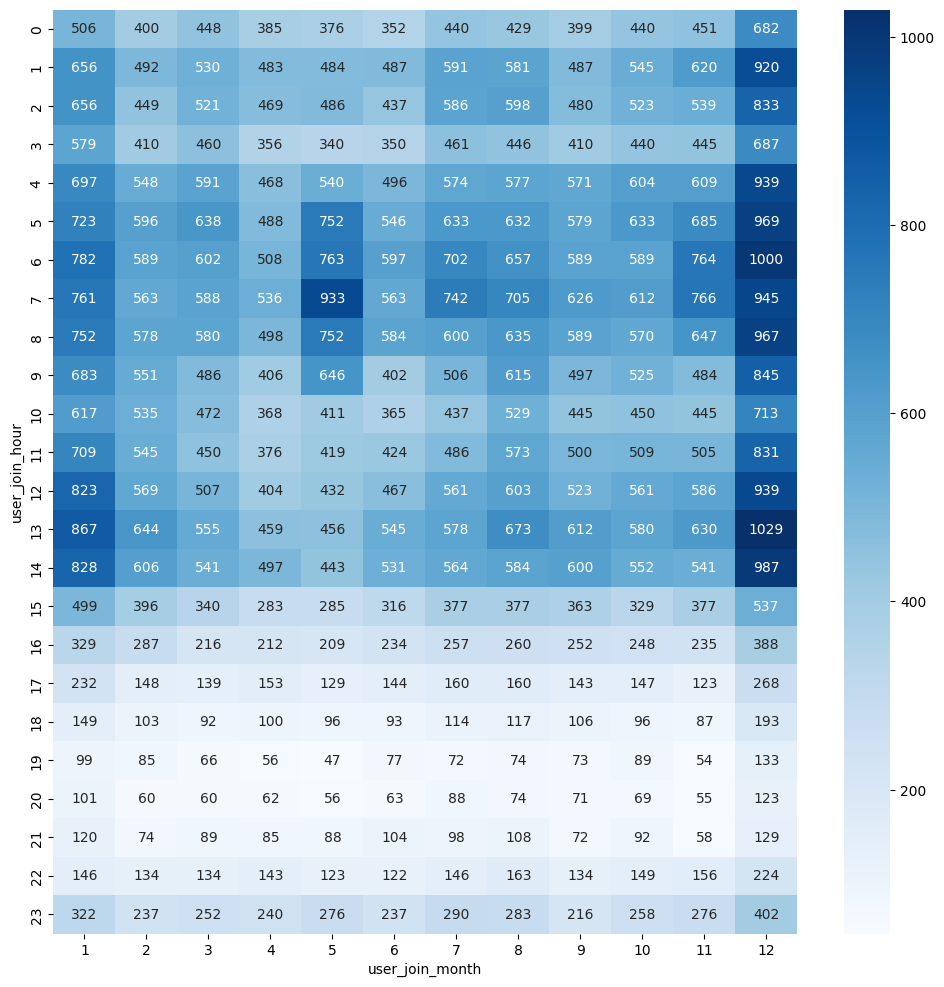

In [89]:
plt.figure(figsize = (12,12))
sns.heatmap(hour_month_pivot, annot = True, fmt = 'd', cmap = 'Blues')

In [90]:
#12, 1, 2, 8, 9월 : 13~14시에 회원가입 활발 --> 방학의 영향?
#나머지 월 : 4~8시에 회원가입 활발


In [91]:
def top3_signup_times_by_month(hour_month_pivot):
    # 결과를 저장할 딕셔너리 초기화
    top_times_by_month = {}

    # 월별로 반복
    for month in hour_month_pivot.columns:
        # 해당 월의 가입 횟수를 내림차순으로 정렬하여 상위 3개 시간을 가져옴
        top_times = hour_month_pivot[month].nlargest(3).index.tolist()
        # 딕셔너리에 월과 상위 3개 시간을 추가
        top_times_by_month[month] = top_times

    return top_times_by_month

# 함수 호출
result = top3_signup_times_by_month(hour_month_pivot)

# 결과 출력
for month, times in result.items():
    print(f"{month}월: Top 3  시간 : {times}")


1월: Top 3  시간 : [13, 14, 12]
2월: Top 3  시간 : [13, 14, 5]
3월: Top 3  시간 : [5, 6, 4]
4월: Top 3  시간 : [7, 6, 8]
5월: Top 3  시간 : [7, 6, 5]
6월: Top 3  시간 : [6, 8, 7]
7월: Top 3  시간 : [7, 6, 5]
8월: Top 3  시간 : [7, 13, 6]
9월: Top 3  시간 : [7, 13, 14]
10월: Top 3  시간 : [5, 7, 4]
11월: Top 3  시간 : [7, 6, 5]
12월: Top 3  시간 : [13, 6, 14]


<Axes: xlabel='user_join_hour'>

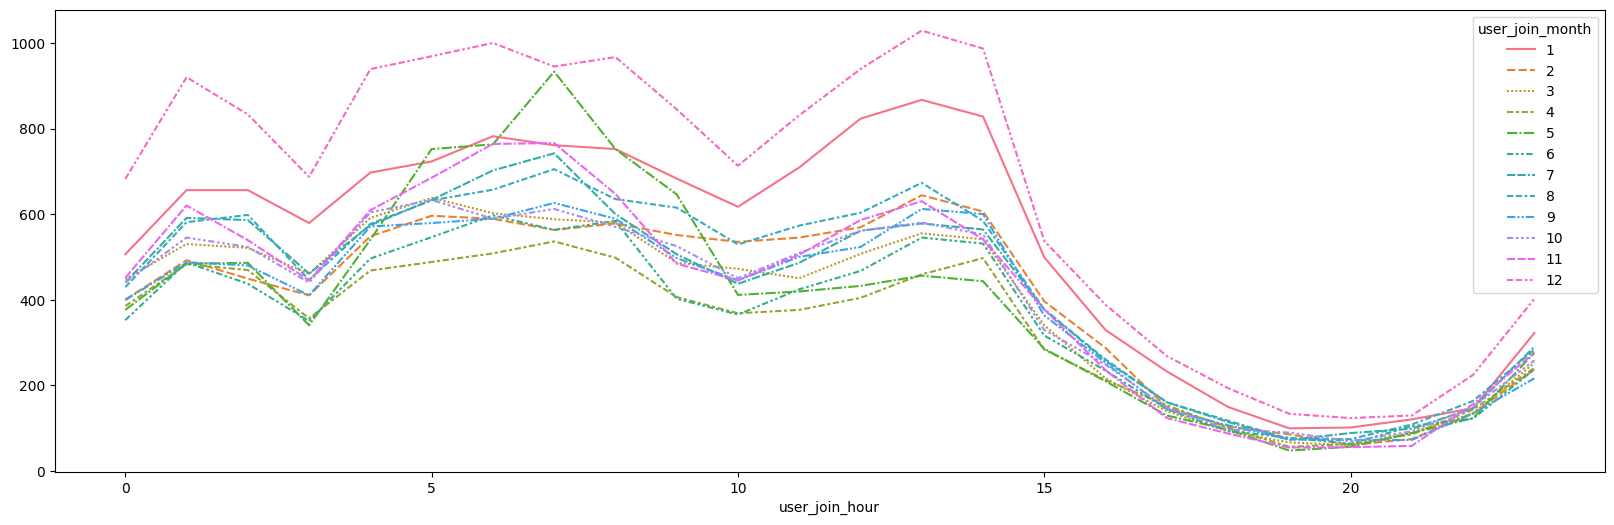

In [92]:

plt.figure(figsize = (20,6))
sns.lineplot(hour_month_pivot)

In [93]:
import plotly.express as px

fig = px.line(hour_month_pivot, x=hour_month_pivot.index, y=hour_month_pivot.columns, title='시간대별 월별 회원 가입 횟수')
fig.update_layout(xaxis_title='시간대', yaxis_title='회원 가입 횟수', legend_title='월')
fig.show()

In [94]:
# 월별 회원 가입 횟수 계산
monthly_signup_counts = user['user_join_month'].value_counts()
#monthly_signup_counts = user['user_join_month'].value_counts().sort_index()
monthly_signup_counts

user_join_month
12    15683
1     12636
8     10453
11    10138
7     10063
10     9610
2      9599
5      9542
3      9357
9      9337
6      8536
4      8035
Name: count, dtype: int64

## 강의 가격 분포 확인
- (Order) 강의 가격(list_price)을 5만원 단위의 도수분포표로 나타내 주세요.
- 강의 가격은 최소 10,000원, 최대 6,690,000원이며, 대부분 5만원 이하에 분포하고 있음
- 참고 - 최대 금액 강의는 하나금융 B2B강의로, 주문 취소 혹은 대기 상태임

In [95]:
print(order['list_price'].min())
print(order['list_price'].max())

10000
6690000


In [96]:
order[order['list_price'] == 6690000]

,order_id,order_type,order_state,name,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price,order_date,weekday,order_year_month,weekend
263323,821913,ORDER,COMPLETED,(B2B) 하나금융,2022-01-18 05:09:18,2022-01-18 05:10:59,116416,6690000,6690000,0,6690000,2022-01-18,Tuesday,2022-01,weekday
263930,819853,ORDER,CANCELLED,(B2B) 하나금융,2022-01-17 04:40:11,2022-01-17 04:41:40,116416,6690000,6690000,0,6690000,2022-01-17,Monday,2022-01,weekday
263942,819834,ORDER,CANCELLED,(B2B) 하나금융,2022-01-17 04:34:02,2022-01-17 04:35:41,116416,6690000,6690000,0,6690000,2022-01-17,Monday,2022-01,weekday
264051,819532,ORDER,PENDING,(B2B) 하나금융,2022-01-17 00:30:39,2022-01-17 00:30:39,116416,6690000,6690000,0,6690000,2022-01-17,Monday,2022-01,weekday


<Axes: xlabel='list_price', ylabel='Density'>

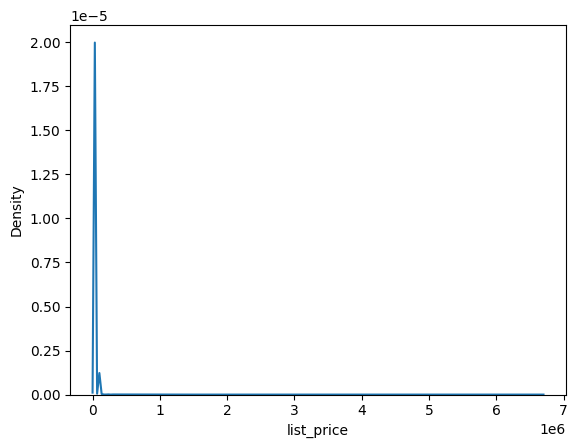

In [97]:
#전체 분포 확인
sns.kdeplot(data = order, x = 'list_price')

In [98]:
# 25만원 이상은 묶어서 그리기

# 새로운 구간 정의
bins = [0, 50000, 100000, 150000, 200000, 250000, float('inf')]
labels = ['~50,000', '50,000~100,000', '100,000~150,000', '150,000~200,000', '200,000~250,000', '250,000~']

# 'list_price'에 대해 새로운 구간으로 데이터를 분류
order['price_range'] = pd.cut(order['list_price'], bins=bins, labels=labels, right=False)

# 새로운 도수분포표 생성
frequency_table_new = order['price_range'].value_counts(sort=False)

frequency_table_new

price_range
~50,000            267266
50,000~100,000      12565
100,000~150,000      3656
150,000~200,000        73
200,000~250,000       172
250,000~              303
Name: count, dtype: int64

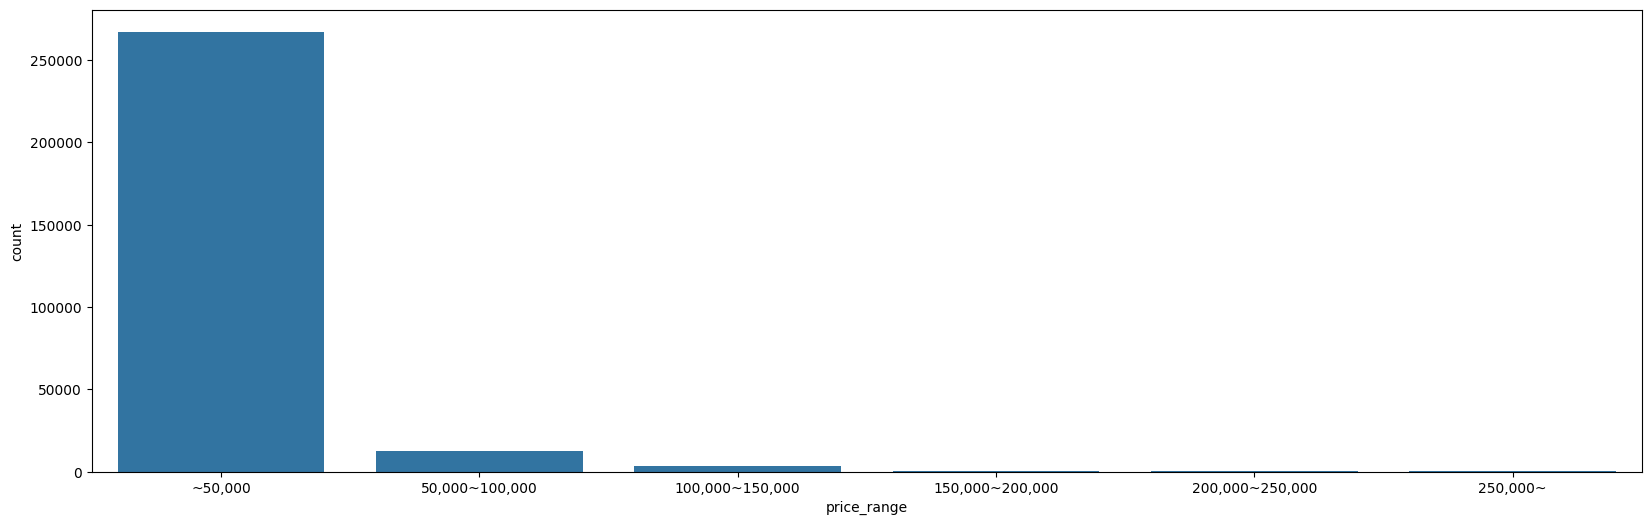

In [99]:
plt.figure(figsize = (20,6))
sns.countplot(x='price_range', data=order, order=labels);


In [100]:
#5만원 미만에 대해 별도의 도수분포표로 분석
order_50000 = order[order['list_price'] <50000]

bucket_size = 10000
buckets_50000 = [(x, x + bucket_size) for x in range(0, order_50000['list_price'].max() + bucket_size, bucket_size)]
price_bins = pd.cut(order_50000['list_price'], bins=pd.IntervalIndex.from_tuples(buckets_50000))
frequency_table_50000 = pd.value_counts(price_bins, sort=False)
frequency_table_50000

list_price
(0, 10000]         22273
(10000, 20000]    115828
(20000, 30000]     97334
(30000, 40000]     31831
(40000, 50000]         0
Name: count, dtype: int64

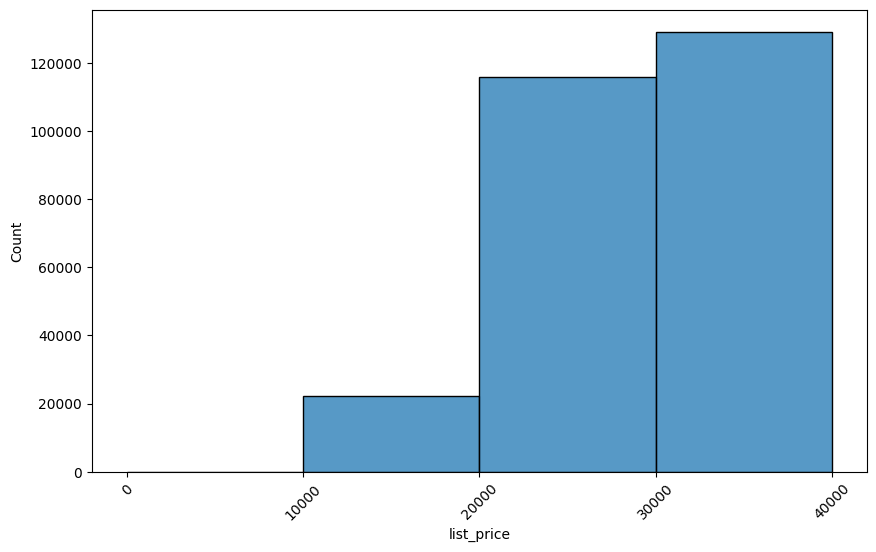

In [101]:
plt.figure(figsize = (10,6))
sns.histplot(order_50000['list_price'], bins=[interval.left for interval in pd.IntervalIndex.from_tuples(buckets_50000)], edgecolor='black')
plt.xticks([interval.left for interval in pd.IntervalIndex.from_tuples(buckets_50000)], rotation=45);  # 구간으로 x축 눈금 설정

## 월-주문상태별 금액 및 유저 비중
- 신청이 완료된 강의(complated)와 진행중인 강의(pending), 그리고 취소된 강의(cancelled) 간의 금액(list_price)과 유저의 비중


In [102]:
# Q2-10 (Order) 신청이 완료된 강의(complated)와 진행중인 강의(pending), 그리고 취소된 강의(cancelled) 간의 금액(list_price)과 유저의 비중을 월별로 각각 구하시오?

order_month_state = order.groupby(['order_year_month', 'order_state']).agg({'list_price' : 'sum', 'customer_id' : 'nunique'})
order_month_state

list_price  customer_id
order_year_month order_state                         
2022-01          CANCELLED     218380000         4374
                 COMPLETED     515660000        14866
                 PENDING       157970000         2878
2022-02          CANCELLED     140410000         3211
                 COMPLETED     396660000        11338
                 PENDING       101860000         1933
2022-03          CANCELLED     138870000         2883
                 COMPLETED     341250000         9787
                 PENDING        95090000         1821
2022-04          CANCELLED     132670000         2455
                 COMPLETED     326280000         8874
                 PENDING       106080000         1753
2022-05          CANCELLED     105310000         2192
                 COMPLETED     294430000         8580
                 PENDING        84820000         1663
2022-06          CANCELLED     126730000         2718
                 COMPLETED     336600000        10079
                 PENDING       102510000         2077
2022-07          CANCELLED     166920000         3068
                 COMPLETED     414130000        11722
                 PENDING       124670000         2126
2022-08          CANCELLED     142310000         3173
                 COMPLETED     370250000        11289
                 PENDING       149980000         2214
2022-09          CANCELLED     149670000         3088
                 COMPLETED     357260000        10542
                 PENDING       115070000         2069
2022-10          CANCELLED     131900000         2806
                 COMPLETED     370320000        10512
                 PENDING       100100000         1843
2022-11          CANCELLED     146690000         2866
                 COMPLETED     413810000        10037
                 PENDING       105790000         1805
2022-12          CANCELLED     180920000         3487
                 COMPLETED     691980000        16855
                 PENDING       176760000         3537

In [103]:
##index 컬럼과 집계 결과 컬럼 구분을 위해 의도적으로 reset_index 안함

# 전체 월별 매출액 총액 계산
total_monthly_revenue = order_month_state.groupby('order_year_month')['list_price'].transform('sum')

# 전체 월별 고객 수 계산
total_monthly_customers = order_month_state.groupby('order_year_month')['customer_id'].transform('sum')

# 월별 매출액 총액의 비중 계산 및 결과에 추가
order_month_state['monthly_revenue_ratio(%)'] = (order_month_state['list_price'] *100 / total_monthly_revenue).round(1)

# 월별 고객 수의 비중 계산 및 결과에 추가
order_month_state['monthly_customers_ratio(%)'] = (order_month_state['customer_id'] *100 / total_monthly_customers).round(1)

order_month_state = order_month_state.rename(columns = {'list_price' : 'list_price_sum', 'customer_id' : 'customer_distinct_count'})
order_month_state

list_price_sum  customer_distinct_count  \
order_year_month order_state                                            
2022-01          CANCELLED         218380000                     4374   
                 COMPLETED         515660000                    14866   
                 PENDING           157970000                     2878   
2022-02          CANCELLED         140410000                     3211   
                 COMPLETED         396660000                    11338   
                 PENDING           101860000                     1933   
2022-03          CANCELLED         138870000                     2883   
                 COMPLETED         341250000                     9787   
                 PENDING            95090000                     1821   
2022-04          CANCELLED         132670000                     2455   
                 COMPLETED         326280000                     8874   
                 PENDING           106080000                     1753   
2022-05          CANCELLED         105310000                     2192   
                 COMPLETED         294430000                     8580   
                 PENDING            84820000                     1663   
2022-06          CANCELLED         126730000                     2718   
                 COMPLETED         336600000                    10079   
                 PENDING           102510000                     2077   
2022-07          CANCELLED         166920000                     3068   
                 COMPLETED         414130000                    11722   
                 PENDING           124670000                     2126   
2022-08          CANCELLED         142310000                     3173   
                 COMPLETED         370250000                    11289   
                 PENDING           149980000                     2214   
2022-09          CANCELLED         149670000                     3088   
                 COMPLETED         357260000                    10542   
                 PENDING           115070000                     2069   
2022-10          CANCELLED         131900000                     2806   
                 COMPLETED         370320000                    10512   
                 PENDING           100100000                     1843   
2022-11          CANCELLED         146690000                     2866   
                 COMPLETED         413810000                    10037   
                 PENDING           105790000                     1805   
2022-12          CANCELLED         180920000                     3487   
                 COMPLETED         691980000                    16855   
                 PENDING           176760000                     3537   

                              monthly_revenue_ratio(%)  \
order_year_month order_state                             
2022-01          CANCELLED                        24.5   
                 COMPLETED                        57.8   
                 PENDING                          17.7   
2022-02          CANCELLED                        22.0   
                 COMPLETED                        62.1   
                 PENDING                          15.9   
2022-03          CANCELLED                        24.1   
                 COMPLETED                        59.3   
                 PENDING                          16.5   
2022-04          CANCELLED                        23.5   
                 COMPLETED                        57.7   
                 PENDING                          18.8   
2022-05          CANCELLED                        21.7   
                 COMPLETED                        60.8   
                 PENDING                          17.5   
2022-06          CANCELLED                        22.4   
                 COMPLETED                        59.5   
                 PENDING                          18.1   
2022-07          CANCELLED                        23.7   
                 COMPLETED           

<Axes: xlabel='month', ylabel='list_price_sum'>

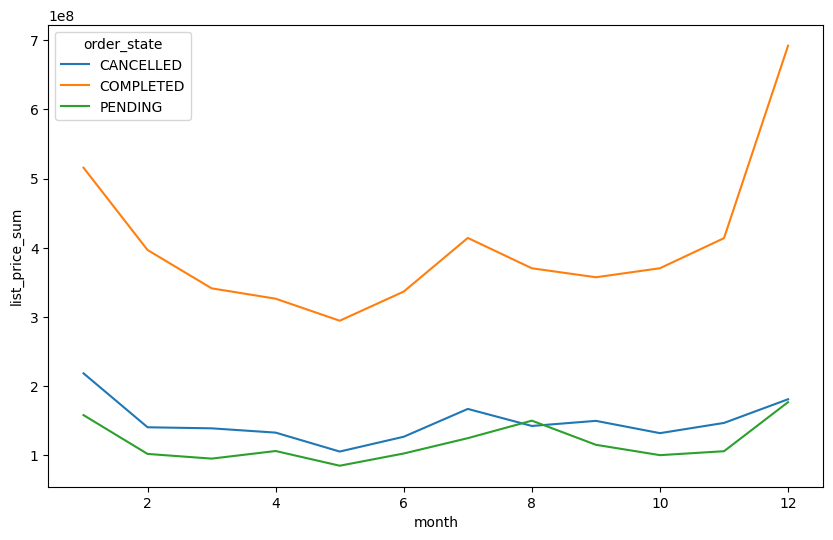

In [104]:
#주문상태-월별 주문금액(list_price) 동향
order_month_state_vis  = order_month_state.reset_index()

order_month_state_vis['month'] = order_month_state_vis['order_year_month'].dt.month

plt.figure(figsize = (10,6))
sns.lineplot(data = order_month_state_vis, x = 'month', y = 'list_price_sum', hue = 'order_state')

<Axes: xlabel='month', ylabel='customer_distinct_count'>

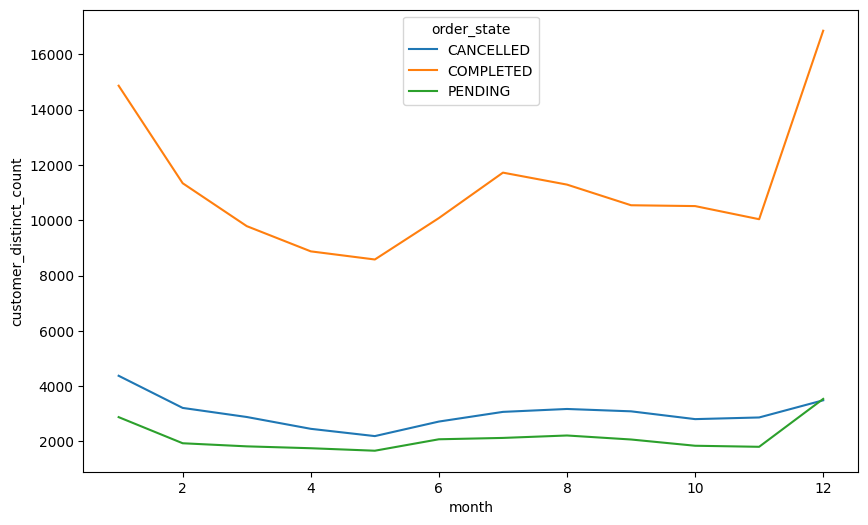

In [105]:
#주문상태-월별 고객 수 동향
plt.figure(figsize = (10,6))
sns.lineplot(data = order_month_state_vis, x = 'month', y = 'customer_distinct_count', hue = 'order_state')

<Axes: xlabel='month', ylabel='monthly_revenue_ratio(%)'>

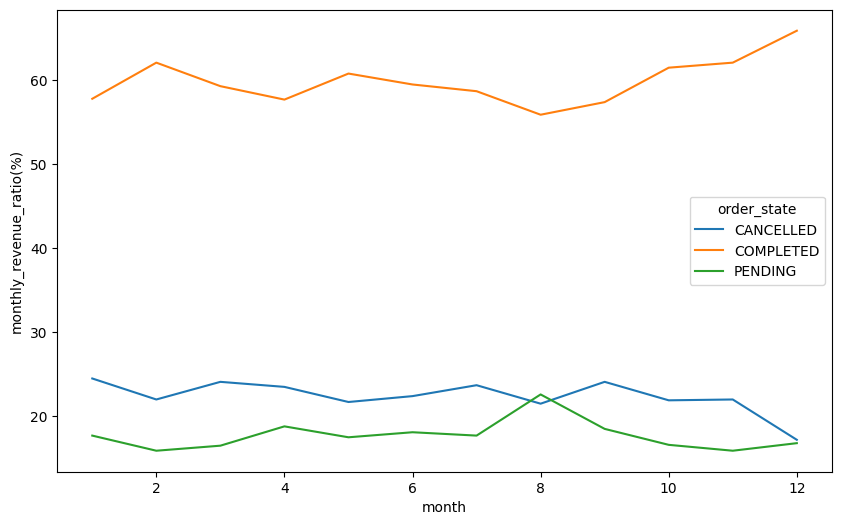

In [106]:
#주문상태-월별 매출액 비중 동향

plt.figure(figsize = (10,6))
sns.lineplot(data = order_month_state_vis, x = 'month', y = 'monthly_revenue_ratio(%)', hue = 'order_state')

<Axes: xlabel='month', ylabel='monthly_customers_ratio(%)'>

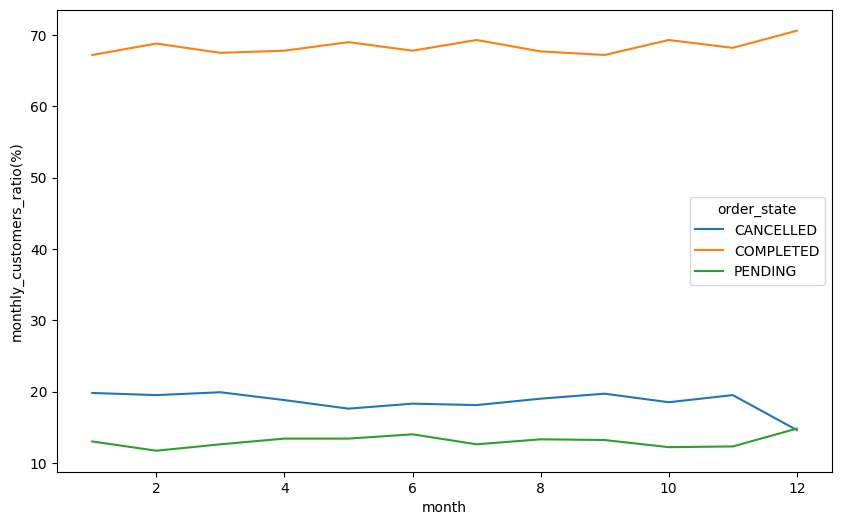

In [107]:
#주문상태-월별 고객 비중 동향

plt.figure(figsize = (10,6))
sns.lineplot(data = order_month_state_vis, x = 'month', y = 'monthly_customers_ratio(%)', hue = 'order_state')

## 휴먼 유저의 ID생성 후 마지막 로그인까지의 기간
- (User) state이 HIBERNATED 된 Used들은 ID를 생성(created_at)하고 마지막 로그인(last_login_at)까지 평균적으로 몇일이 걸렸나요?
- 평균 154일이 소요됨
- 분포 확인 시 0일인 경우 다수로 나타남. 0일인 경우 제외 시, 평균 216일이 소요됨

In [108]:
# Q2-11 (User) state이 HIBERNATED 된 Used들은 ID를 생성(created_at)하고 마지막 로그인(last_login_at)까지 평균적으로 몇일이 걸렸나요?

user_hibernated = user[user['user_state'] == 'HIBERNATED']
user_hibernated['last_login_date'] = pd.to_datetime(user_hibernated['last_login_at']).dt.normalize()
user_hibernated['user_hiber_days'] = user_hibernated['last_login_date'] - user_hibernated['user_join_date']
print(user_hibernated['user_hiber_days'].mean())

154 days 11:45:04.321257092


<ipython-input-108-9b6bb3ff36b6>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-108-9b6bb3ff36b6>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [109]:
user_hibernated['user_hiber_days'] = user_hibernated['user_hiber_days'].apply(lambda x: x.days)


<ipython-input-109-b0c621086a80>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
user_hibernated['user_hiber_days'].mean()

154.48963334788303

<Axes: xlabel='user_hiber_days', ylabel='Density'>

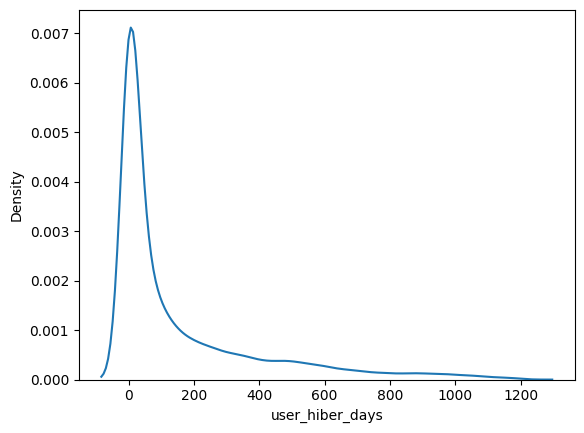

In [111]:
sns.kdeplot(data = user_hibernated, x = 'user_hiber_days')

In [112]:
import plotly.graph_objs as go


boxplot = go.Box(y=user_hibernated['user_hiber_days'], x=['days']*len(user_hibernated), marker=dict(color = '#9467bd'))
layout = go.Layout(title='휴면 유저의 아이디 생성일부터 마지막 로그인까지의 기간(days)', width = 800, height = 600)

fig = go.Figure(data=[boxplot], layout=layout)
fig.show()


In [113]:
#0일인 경우 제외

user_hibernated_not0 = user_hibernated[user_hibernated['user_hiber_days']!=0]
print(user_hibernated_not0['user_hiber_days'].mean())

216.18357561690692


# Monthly Trend Analysis
각 Dataset(order, course, user, customer and refund)의 월별 trend

- (order) 월별 주문금액(list_price) 동향

<ipython-input-114-0e47ae630b1c>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: xlabel='month', ylabel='list_price'>

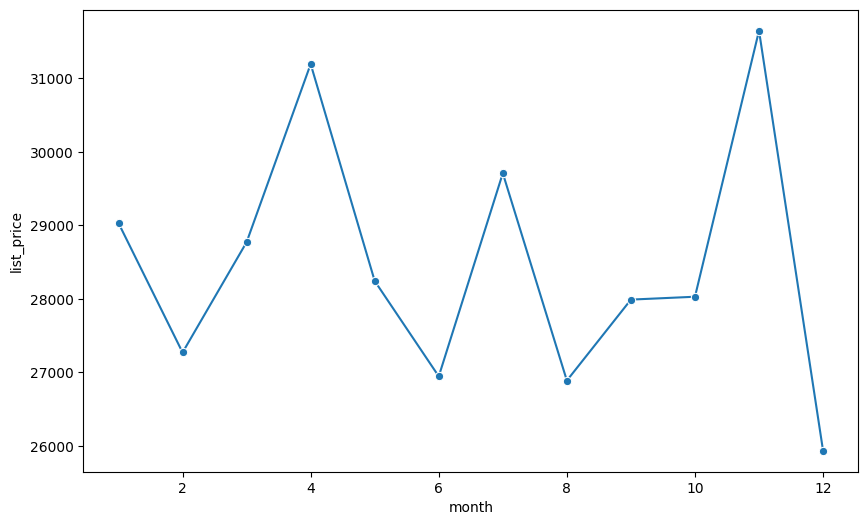

In [114]:
#order
order_vis = order
order_vis['month'] = order_vis['order_year_month'].dt.month
plt.figure(figsize = (10,6))
sns.lineplot(data = order_vis, x = 'month', y = 'list_price', marker = 'o', ci = None)

* (course) 월별 주문 수 동향

In [115]:
course['course_create_date'] = pd.to_datetime(course['created_at']).dt.normalize()
course['course_year_month'] = course['course_create_date'].dt.to_period('M')

In [116]:
course_vis = course
course_vis['month'] = course_vis['course_year_month'].dt.month
course_month_count = course_vis.groupby('month').agg({'course_id' : 'nunique'}).reset_index()
course_month_count = course_month_count.rename(columns = {'course_id' : 'course_count'})

<Axes: xlabel='month', ylabel='course_count'>

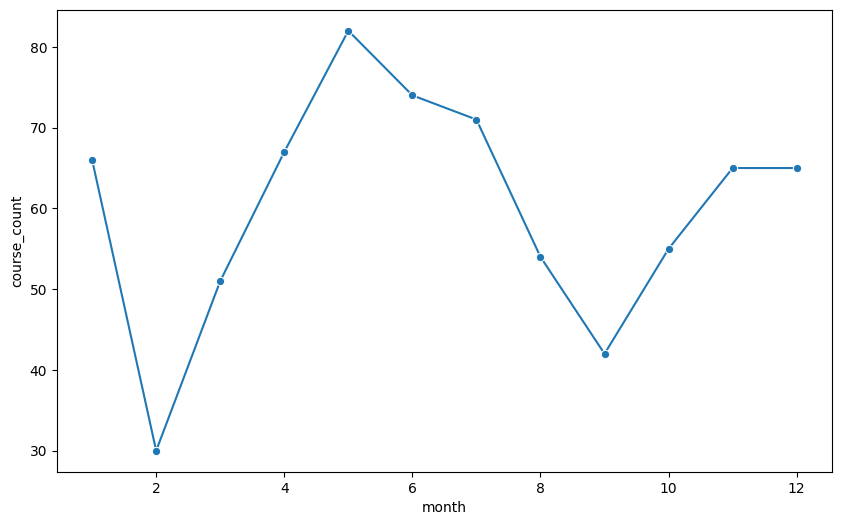

In [117]:
plt.figure(figsize = (10,6))
sns.lineplot(data = course_month_count, x = 'month', y = 'course_count', marker = 'o')

* (user) 월별 신규 가입 회원 수 동향

In [118]:
user['user_join_year_month'] = user['user_join_date'].dt.to_period('M')

In [119]:
user_vis = user
user_vis['month'] = user_vis['user_join_year_month'].dt.month
user_month_count = user_vis.groupby('month').agg({'user_id' : 'nunique'}).reset_index()
user_month_count = user_month_count.rename(columns = {'user_id' : 'user_count'})

<Axes: xlabel='month', ylabel='user_count'>

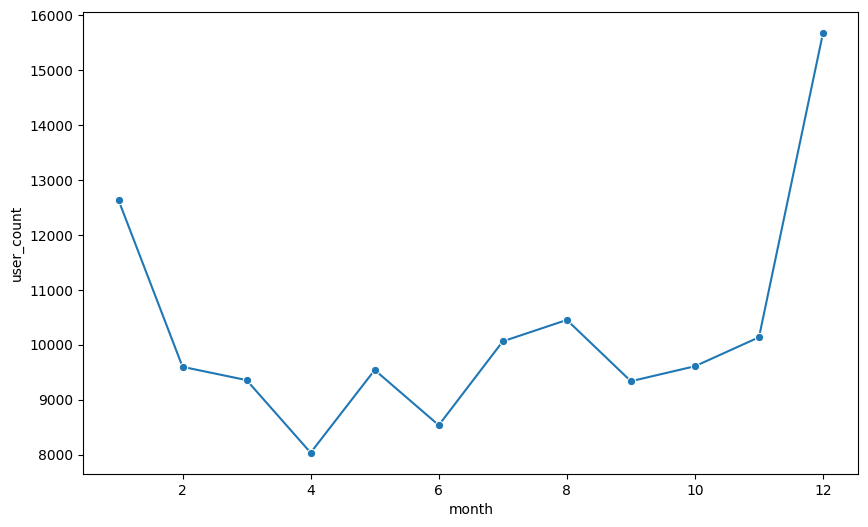

In [120]:
plt.figure(figsize = (10,6))
sns.lineplot(data = user_month_count, x = 'month', y = 'user_count', marker = 'o')

- (customer) 월별 신규 customer 수 동향

In [121]:
customer['customer_join_year_month'] = customer['customer_join_date'].dt.to_period('M')

In [122]:
customer_vis = customer
customer_vis['month'] = customer_vis['customer_join_year_month'].dt.month
customer_month_count = customer_vis.groupby('month').agg({'customer_id' : 'nunique'}).reset_index()
customer_month_count = customer_month_count.rename(columns = {'customer_id' : 'customer_count'})

<Axes: xlabel='month', ylabel='customer_count'>

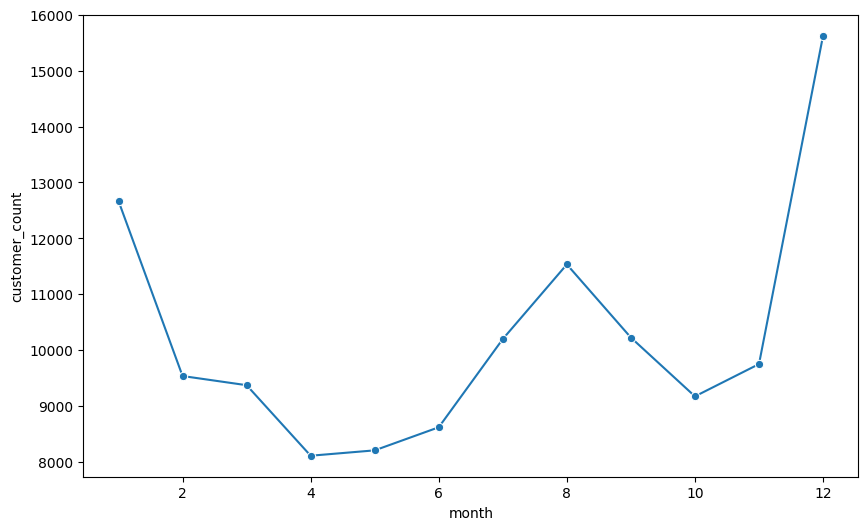

In [123]:
plt.figure(figsize = (10,6))
sns.lineplot(data = customer_month_count, x = 'month', y = 'customer_count', marker = 'o')


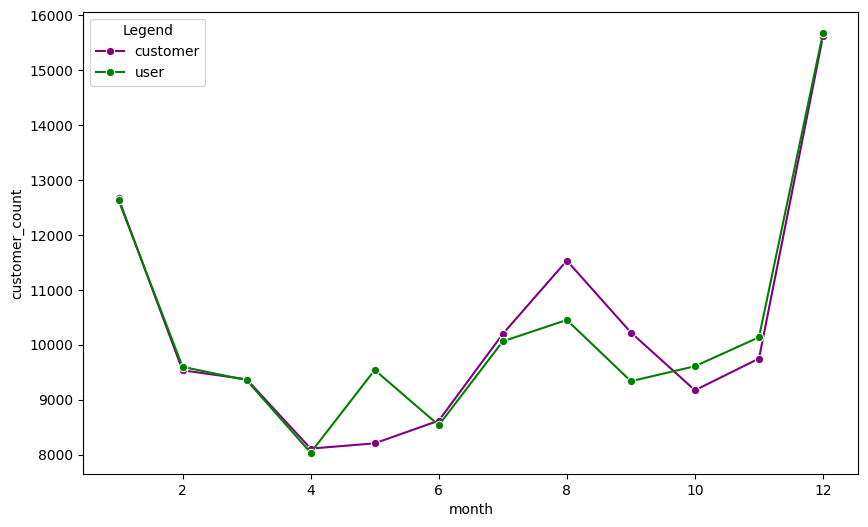

In [124]:
#customer와 user 의 차이 분석
plt.figure(figsize = (10,6))
sns.lineplot(data = customer_month_count, x = 'month', y = 'customer_count', marker = 'o', color = 'purple', label = 'customer')
sns.lineplot(data = user_month_count, x = 'month', y = 'user_count', marker = 'o', color = 'green', label = 'user')
plt.legend(title='Legend')



- (refund) 월별 환불 금액 동향

In [125]:
refund['refund_year_month'] = pd.to_datetime(refund['refund_date']).dt.to_period('M')

<ipython-input-126-a9c4933aacc1>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: xlabel='month', ylabel='refund_amount_positive'>

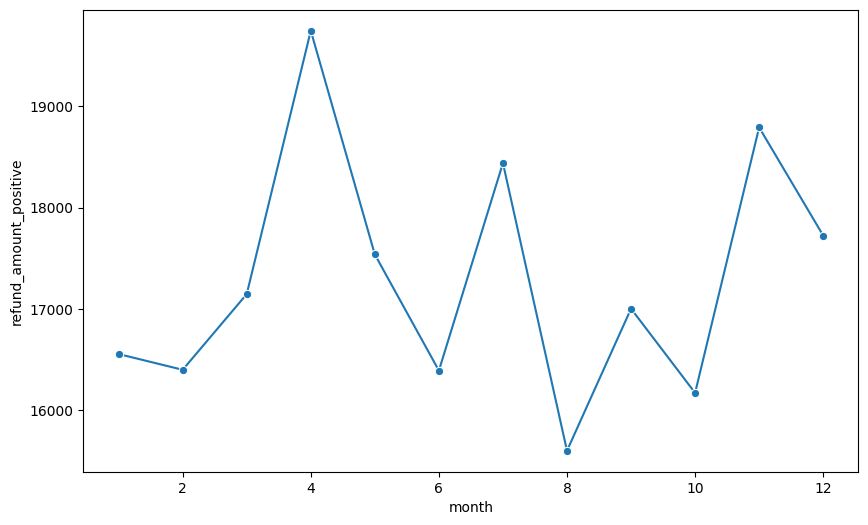

In [126]:
refund_vis = refund
refund_vis['month'] = refund_vis['refund_year_month'].dt.month
refund_vis['refund_amount_positive'] = refund_vis['refund_amount'] * -1
plt.figure(figsize = (10,6))
sns.lineplot(data = refund_vis, x = 'month', y = 'refund_amount_positive' , marker = 'o', ci = None)

# RFM 분석 기반 고객 세그먼트 도출



- RFM분석 시행하여 고객 sementation 파악 가능한 대시보드 생성
- 대시보드 링크
https://public.tableau.com/views/fastcampuscustomersegmentation-rfm/1?:language=ko-KR&:sid=&:display_count=n&:origin=viz_share_link

In [127]:
#r : 마지막 구매일
#f : 강의 구매 빈도
#m : 강의 구매 금액
#r,f,m을 customer_id 기준으로 집계한다.

In [128]:
#customer table에는 로그인 정보가 없어서, user table과 join한다.
user_customer['last_login_date'] = pd.to_datetime(user_customer['last_login_at']).dt.normalize()
print(user_customer['last_login_date'].min())
print(user_customer['last_login_date'].max())

2021-11-14 00:00:00
2024-01-26 00:00:00


In [129]:
#각 고객의 마지막 구매일 계산
last_purchase_date = order.groupby('customer_id')['order_date'].max()
last_purchase_date

customer_id
37        2022-06-19
46        2022-10-04
52        2022-09-02
56        2022-12-14
86        2022-10-03
             ...    
1083649   2022-12-31
1083664   2022-12-31
1083669   2022-12-31
1083679   2022-12-31
1204943   2022-04-11
Name: order_date, Length: 101719, dtype: datetime64[ns]

In [130]:
#각 고객의 첫 구매일 계산
first_purchase_date = order.groupby('customer_id')['order_date'].min()
first_purchase_date

customer_id
37        2022-06-18
46        2022-09-10
52        2022-09-02
56        2022-12-09
86        2022-10-03
             ...    
1083649   2022-12-31
1083664   2022-12-31
1083669   2022-12-31
1083679   2022-12-31
1204943   2022-01-10
Name: order_date, Length: 101719, dtype: datetime64[ns]

In [131]:
order['order_date'].max()

Timestamp('2022-12-31 00:00:00')

In [132]:
#order_date의 최대값인 2022.12.31 기준, 각 고객의 구매 경과일수 계산
purchase_elapsed_days = (pd.to_datetime('2022-12-31') - last_purchase_date).dt.days
purchase_elapsed_days

customer_id
37         195
46          88
52         120
56          17
86          89
          ... 
1083649      0
1083664      0
1083669      0
1083679      0
1204943    264
Name: order_date, Length: 101719, dtype: int64

In [133]:
# 각 고객의 총 구매 일수 계산
total_purchase_days = order.groupby('customer_id')['order_date'].count()
total_purchase_days

customer_id
37         4
46         3
52         1
56         3
86         1
          ..
1083649    1
1083664    1
1083669    1
1083679    1
1204943    8
Name: order_date, Length: 101719, dtype: int64

In [134]:
#구매주기 계산
purchase_frequency = (last_purchase_date - first_purchase_date) / (total_purchase_days - 1)
purchase_frequency = purchase_frequency.dt.days
purchase_frequency

customer_id
37          0.0
46         12.0
52          NaN
56          2.0
86          NaN
           ... 
1083649     NaN
1083664     NaN
1083669     NaN
1083679     NaN
1204943    13.0
Name: order_date, Length: 101719, dtype: float64

In [135]:
order[order['customer_id'] == 37]

,order_id,order_type,order_state,name,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price,order_date,weekday,order_year_month,weekend,price_range,month
163428,1127779,ORDER,COMPLETED,초격차 패키지: 한,2022-06-19 09:16:59,2022-06-19 09:18:14,37,20000,20000,0,20000,2022-06-19,Sunday,2022-06,weekend,"~50,000",6
163627,1127253,ORDER,COMPLETED,프로모션 : 기초부,2022-06-19 01:53:05,2022-06-19 01:55:30,37,130000,130000,0,40000,2022-06-19,Sunday,2022-06,weekend,"100,000~150,000",6
163688,1127110,ORDER,PENDING,프로모션 : 기초부,2022-06-18 19:33:23,2022-06-18 19:33:23,37,130000,130000,0,40000,2022-06-18,Saturday,2022-06,weekend,"100,000~150,000",6
163689,1127098,ORDER,PENDING,초격차 패키지: 한,2022-06-18 19:15:13,2022-06-18 19:15:13,37,20000,20000,0,20000,2022-06-18,Saturday,2022-06,weekend,"~50,000",6


In [136]:
#총 구매일이 1이어서 purchase_frequency 의 분모가 0이된 경우, nan발생 --> -1으로 대체
#frequency가 높을수록 높은 점수 부여이므로, 구매일이 1인 경우는 가장 최하점이 되도록 마이너스 점수 부여
purchase_frequency = purchase_frequency.fillna(-1)

In [137]:
# 결과를 데이터프레임으로 합치기
df_purchase = pd.DataFrame({
  #  'customer_id': last_purchase_date.index,
    'last_purchase_date': last_purchase_date,
    'first_purchase_date': first_purchase_date,
    'total_purchase_days': total_purchase_days,
    'purchase_elapsed_days': purchase_elapsed_days, #구매경과일수
    'purchase_frequency': purchase_frequency #구매주기
}).reset_index()

df_purchase

,customer_id,last_purchase_date,first_purchase_date,total_purchase_days,purchase_elapsed_days,purchase_frequency
0,37,2022-06-19,2022-06-18,4,195,0.0
1,46,2022-10-04,2022-09-10,3,88,12.0
2,52,2022-09-02,2022-09-02,1,120,-1.0
3,56,2022-12-14,2022-12-09,3,17,2.0
4,86,2022-10-03,2022-10-03,1,89,-1.0
...,...,...,...,...,...,...
101714,1083649,2022-12-31,2022-12-31,1,0,-1.0
101715,1083664,2022-12-31,2022-12-31,1,0,-1.0
101716,1083669,2022-12-31,2022-12-31,1,0,-1.0
101717,1083679,2022-12-31,2022-12-31,1,0,-1.0


In [138]:
df_purchase[['customer_id','purchase_elapsed_days', 'purchase_frequency']]

,customer_id,purchase_elapsed_days,purchase_frequency
0,37,195,0.0
1,46,88,12.0
2,52,120,-1.0
3,56,17,2.0
4,86,89,-1.0
...,...,...,...
101714,1083649,0,-1.0
101715,1083664,0,-1.0
101716,1083669,0,-1.0
101717,1083679,0,-1.0


In [139]:
df_monetary = order.groupby('customer_id').agg({'list_price':'sum'}).reset_index()

In [140]:
#101719행으로 정상 join됨
df_rfm_raw = pd.merge(df_purchase, df_monetary, on = 'customer_id', how = 'inner')
df_rfm_raw

,customer_id,last_purchase_date,first_purchase_date,total_purchase_days,purchase_elapsed_days,purchase_frequency,list_price
0,37,2022-06-19,2022-06-18,4,195,0.0,300000
1,46,2022-10-04,2022-09-10,3,88,12.0,80000
2,52,2022-09-02,2022-09-02,1,120,-1.0,160000
3,56,2022-12-14,2022-12-09,3,17,2.0,40000
4,86,2022-10-03,2022-10-03,1,89,-1.0,230000
...,...,...,...,...,...,...,...
101714,1083649,2022-12-31,2022-12-31,1,0,-1.0,30000
101715,1083664,2022-12-31,2022-12-31,1,0,-1.0,20000
101716,1083669,2022-12-31,2022-12-31,1,0,-1.0,20000
101717,1083679,2022-12-31,2022-12-31,1,0,-1.0,10000


In [141]:
df_rfm = df_rfm_raw[['customer_id', 'purchase_elapsed_days', 'purchase_frequency', 'list_price']]
df_rfm

,customer_id,purchase_elapsed_days,purchase_frequency,list_price
0,37,195,0.0,300000
1,46,88,12.0,80000
2,52,120,-1.0,160000
3,56,17,2.0,40000
4,86,89,-1.0,230000
...,...,...,...,...
101714,1083649,0,-1.0,30000
101715,1083664,0,-1.0,20000
101716,1083669,0,-1.0,20000
101717,1083679,0,-1.0,10000


In [142]:
df_rfm.describe()

,customer_id,purchase_elapsed_days,purchase_frequency,list_price
count,1.017190e+05,101719.000000,101719.000000,1.017190e+05
mean,7.236447e+05,162.282071,10.205645,7.894405e+04
std,3.147855e+05,115.179002,30.344984,2.146276e+05
min,3.700000e+01,0.000000,-1.000000,1.000000e+04
25%,5.611995e+05,57.000000,-1.000000,3.000000e+04
50%,8.268590e+05,153.000000,0.000000,4.000000e+04
75%,9.620745e+05,268.000000,6.000000,9.000000e+04
max,1.204943e+06,364.000000,362.000000,5.520000e+07


<Axes: xlabel='purchase_elapsed_days'>

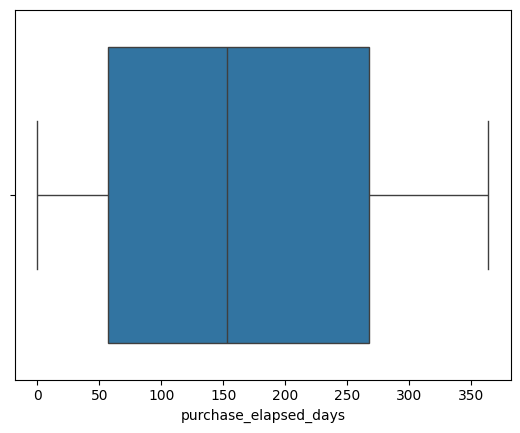

In [143]:
sns.boxplot(data= df_rfm, x = 'purchase_elapsed_days')


<Axes: xlabel='purchase_frequency'>

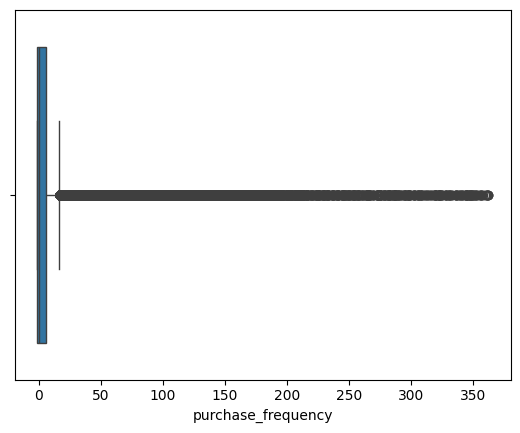

In [144]:
sns.boxplot(data= df_rfm, x = 'purchase_frequency')

In [145]:
print(df_rfm['purchase_frequency'].quantile(0.5))
print(df_rfm['purchase_frequency'].quantile(0.75))

0.0
6.0


<Axes: xlabel='list_price'>

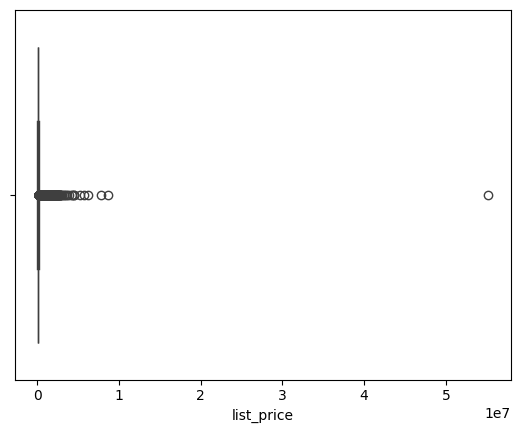

In [146]:
sns.boxplot(data= df_rfm, x = 'list_price')

In [147]:
print(df_rfm['list_price'].quantile(0.5))
print(df_rfm['list_price'].quantile(0.75))
print(df_rfm['list_price'].quantile(0.9))

40000.0
90000.0
160000.0


In [148]:
df_rfm['R_score'] = pd.qcut(df_rfm['purchase_elapsed_days'], 3, labels=[3, 2, 1])
df_rfm['F_score'] = pd.cut(df_rfm['purchase_frequency'], bins=[-np.inf, df_rfm['purchase_frequency'].quantile(0.5), df_rfm['purchase_frequency'].quantile(0.75), np.inf], labels=[1, 2, 3], duplicates='drop')
df_rfm['M_score'] = pd.cut(df_rfm['list_price'], bins=[-np.inf, df_rfm['list_price'].quantile(0.5), df_rfm['list_price'].quantile(0.75), df_rfm['list_price'].quantile(0.9), np.inf], labels=[1, 2, 3, 4], duplicates='drop')

# RFM_score 생성 (예: '334'은 최고 점수, '111'은 최저 점수)
df_rfm['RFM_score'] = df_rfm['R_score'].astype(str) + df_rfm['F_score'].astype(str) + df_rfm['M_score'].astype(str)

#total_score생성(가중치고려)
df_rfm['total_score'] = 0.4 * df_rfm['R_score'].astype(int) + 0.2 * df_rfm['F_score'].astype(int) + 0.4 * df_rfm['M_score'].astype(int)


df_rfm

<ipython-input-148-755dd4c0b902>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-148-755dd4c0b902>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customer_id,purchase_elapsed_days,purchase_frequency,list_price,R_score,F_score,M_score,RFM_score,total_score
0,37,195,0.0,300000,2,1,4,214,2.6
1,46,88,12.0,80000,3,3,2,332,2.6
2,52,120,-1.0,160000,2,1,3,213,2.2
3,56,17,2.0,40000,3,2,1,321,2.0
4,86,89,-1.0,230000,3,1,4,314,3.0
...,...,...,...,...,...,...,...,...,...
101714,1083649,0,-1.0,30000,3,1,1,311,1.8
101715,1083664,0,-1.0,20000,3,1,1,311,1.8
101716,1083669,0,-1.0,20000,3,1,1,311,1.8
101717,1083679,0,-1.0,10000,3,1,1,311,1.8


count    101719.000000
mean          1.839521
std           0.650583
min           1.000000
25%           1.400000
50%           1.800000
75%           2.200000
max           3.400000
Name: total_score, dtype: float64


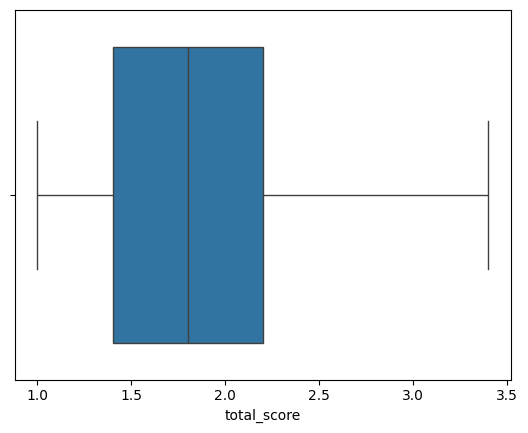

In [149]:
sns.boxplot(df_rfm, x = 'total_score')
print(df_rfm['total_score'].describe())

In [150]:
df_rfm['RFM_score'].nunique()


36

In [151]:
df_rfm.groupby('RFM_score').count()['customer_id']

RFM_score
111    18096
112     5183
113     1772
114      790
121      252
122      729
123      605
124      648
131      838
132     3226
133     1232
134      424
211    16665
212     4380
213     1418
214      739
221      312
222      753
223      564
224      543
231      974
232     3549
233     2108
234     1398
311    13571
312     3959
313     1978
314      815
321      409
322      805
323      660
324      774
331     1010
332     4032
333     2990
334     3518
Name: customer_id, dtype: int64

In [152]:
#RFM 최우수 : 333 334 --> 최우수 --> 프리미엄 서비스 제공
#R높 F낮 M높 : R=3 / F=1,2 / M= 3,4 --> 313 314 323 324 --> 신규 중요 고객군(최근에 돈 많이씀)
#R낮 F높 M높 : R=1,2 / F = 3 / M = 3,4 --> 133 134 233 234 --> 이탈 위험 중요 고객군(예전에 자주와서 돈 많이씀)
#R높 F높 M낮 : R=3 / F=3 / M = 1,2 --> 331 332 --> 잠재 고객군(최근에 자주 구매했으나 금액 낮음)
#R낮 F낮 M높 : R=1,2 / F= 1,2 / M = 3,4 --> 113 114 123 124 213 214 223 224 --> 단기 구매 고객군(예전에 잠깐 와서 돈 많이씀)
#R낮 F높 M낮 : R = 1,2 / F = 3 / M = 1,2 --> 131 132 231 232 --> 과거 탐색 고객군(최근에 안오는데 한때 자주왔고 돈은 안씀)
#R높 F낮 M낮 : R = 3 / F = 1,2 / M = 1,2 --> 311 312 321 322 -->현재 탐색 고객군(최근에 자주 와서 우리서비스를 탐색중. 아직 돈은 안씀)
#R낮 F낮 M낮 : R = 1,2 / F = 1,2 / M = 1,2 --> 112 121 122 211 212 221 222 --> 저수익성 고객군
#R,F,M 최저 : R = 1 / F = 1 / M = 1 --> 111 --> 초저수익성 고객군

def rfm_category(rfm_score):
    if rfm_score in ['333', '334']:
        return '1_최우수고객'
    elif rfm_score in ['313', '314', '323', '324']:
        return '2_신규중요고객'
    elif rfm_score in ['133', '134', '233', '234']:
        return '3_이탈위험중요고객'
    elif rfm_score in ['331', '332']:
        return '4_저단가중요고객'
    elif rfm_score in ['113', '114', '123', '124', '213', '214', '223', '224']:
        return '5_단기구매고객'
    elif rfm_score in ['131', '132', '231', '232']:
        return '6_과거탐색고객'
    elif rfm_score in ['311', '312', '321', '322']:
        return '7_현재 탐색 고객'
    elif rfm_score in ['112', '121', '122', '211', '212', '221', '222']:
        return '8_저수익성고객'
    elif rfm_score in ['111']:
        return '9_초저수익성고객'

df_rfm['category'] = df_rfm['RFM_score'].apply(rfm_category)

df_rfm

,customer_id,purchase_elapsed_days,purchase_frequency,list_price,R_score,F_score,M_score,RFM_score,total_score,category
0,37,195,0.0,300000,2,1,4,214,2.6,5_단기구매고객
1,46,88,12.0,80000,3,3,2,332,2.6,4_저단가중요고객
2,52,120,-1.0,160000,2,1,3,213,2.2,5_단기구매고객
3,56,17,2.0,40000,3,2,1,321,2.0,7_현재 탐색 고객
4,86,89,-1.0,230000,3,1,4,314,3.0,2_신규중요고객
...,...,...,...,...,...,...,...,...,...,...
101714,1083649,0,-1.0,30000,3,1,1,311,1.8,7_현재 탐색 고객
101715,1083664,0,-1.0,20000,3,1,1,311,1.8,7_현재 탐색 고객
101716,1083669,0,-1.0,20000,3,1,1,311,1.8,7_현재 탐색 고객
101717,1083679,0,-1.0,10000,3,1,1,311,1.8,7_현재 탐색 고객


In [153]:
df_rfm['category'].isnull().sum()

0

In [154]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

<Axes: xlabel='category', ylabel='count'>

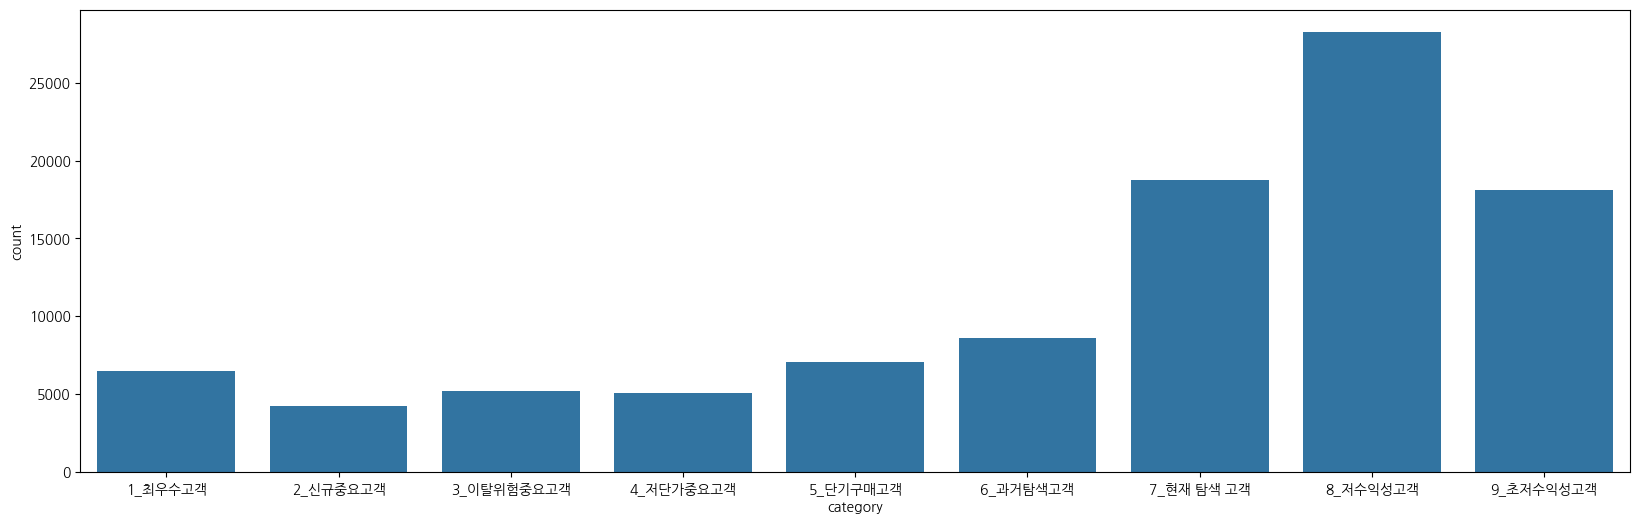

In [155]:
plt.figure(figsize = (20,6))
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] =False
sns.countplot(data = df_rfm.sort_values(by = 'category'), x = 'category')

In [156]:
df_rfm.groupby('category').agg({'total_score':'mean'})

,total_score
category,
1_최우수고객,3.216226
2_신규중요고객,2.818216
3_이탈위험중요고객,2.612863
4_저단가중요고객,2.519873
5_단기구매고객,2.204803
6_과거탐색고객,1.926284
7_현재 탐색 고객,1.914618
8_저수익성고객,1.483526
9_초저수익성고객,1.000000


In [157]:
#order.to_csv('order_table.csv')

In [158]:
#df_rfm.to_csv('rfm_table.csv')